# Who Pays Writers: Relationships and Distributions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
% matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

plt.style.use('seaborn')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
warnings.filterwarnings('ignore')

df = pd.read_csv('allData_clean.csv')
df.sample(3)

publication  year  wordRate  wordCount flatRate  totalPaid  \
2457      Broadly  2017      0.30     1000.0    False     300.00   
3298       Popula  2018      0.20     1500.0    False     300.00   
2828  The Hairpin  2017      0.59      169.0    False      99.71   

      paymentDifficulty daysToBePaid storyType levelOfReporting relationship  \
2457                2.0           90       NaN           Medium   Cold Pitch   
3298                2.0           30   Opinion            Light     Referral   
2828                1.0           90       NaN            Light   Cold Pitch   

             rights platform contract comment  
2457  Unknown/Other  Digital   Verbal     NaN  
3298  Unknown/Other  Digital      Yes     NaN  
2828  Unknown/Other  Digital      Yes     NaN

Data is roughly structured into the following groups
* Meta
    * publication
    * year : 2012-2018
* Payment
    * wordRate : (Dollar per word, regardless of flatRate)
    * wordCount
    * flatRate : True/False
    * totalPaid
* Payment red tape
    * paymentDifficulty : 1-5 (where 1 is "beyond easy", 5 is "impossible")*
    * daysToBePaid : 15, 30, 42, 60, 90, >90
* Effort
    * storyType : News, Opinion, Feature, Blog, Criticism, Profile, FoB (front of book)
    * levelOfReporting : Light, Medium, Heavy
* Business
    * relationship : Cold Pitch, Ongoing, Assignment, Referral, Solicited Pitch, Spec
    * rights : First, Secondary, All, Unknown/Other**
    * platform : Digital, Print
    * contract : Yes, No, Verbal
* Other
    * comment

---
*paymentDifficulty: The wording and emojis used in survey

`1` beyond easy üòç

`2` not that difficult üòè

`3` an average amount of hassle üôÑ

`4` a huge hassle üò§

`5` impossible üò°

---

**Rights

`First`

First Serial Rights:
The publication bought exclusive rights to publish the material first, then rights ultimately revert to me (notwithstanding the publication‚Äôs ability to keep the material available as part of its digital archive or website, nonexclusively)

`Secondary`

Second Rights:
The publication bought rights to republish/reprint material that had already appeared elsewhere

`All`

All rights:

The publication bought all rights, or it was a work for hire; I gave up my rights to republish or use the work elsewhere

# Numerical Data

## Independent distributions

Text(0.5,0,'percent')

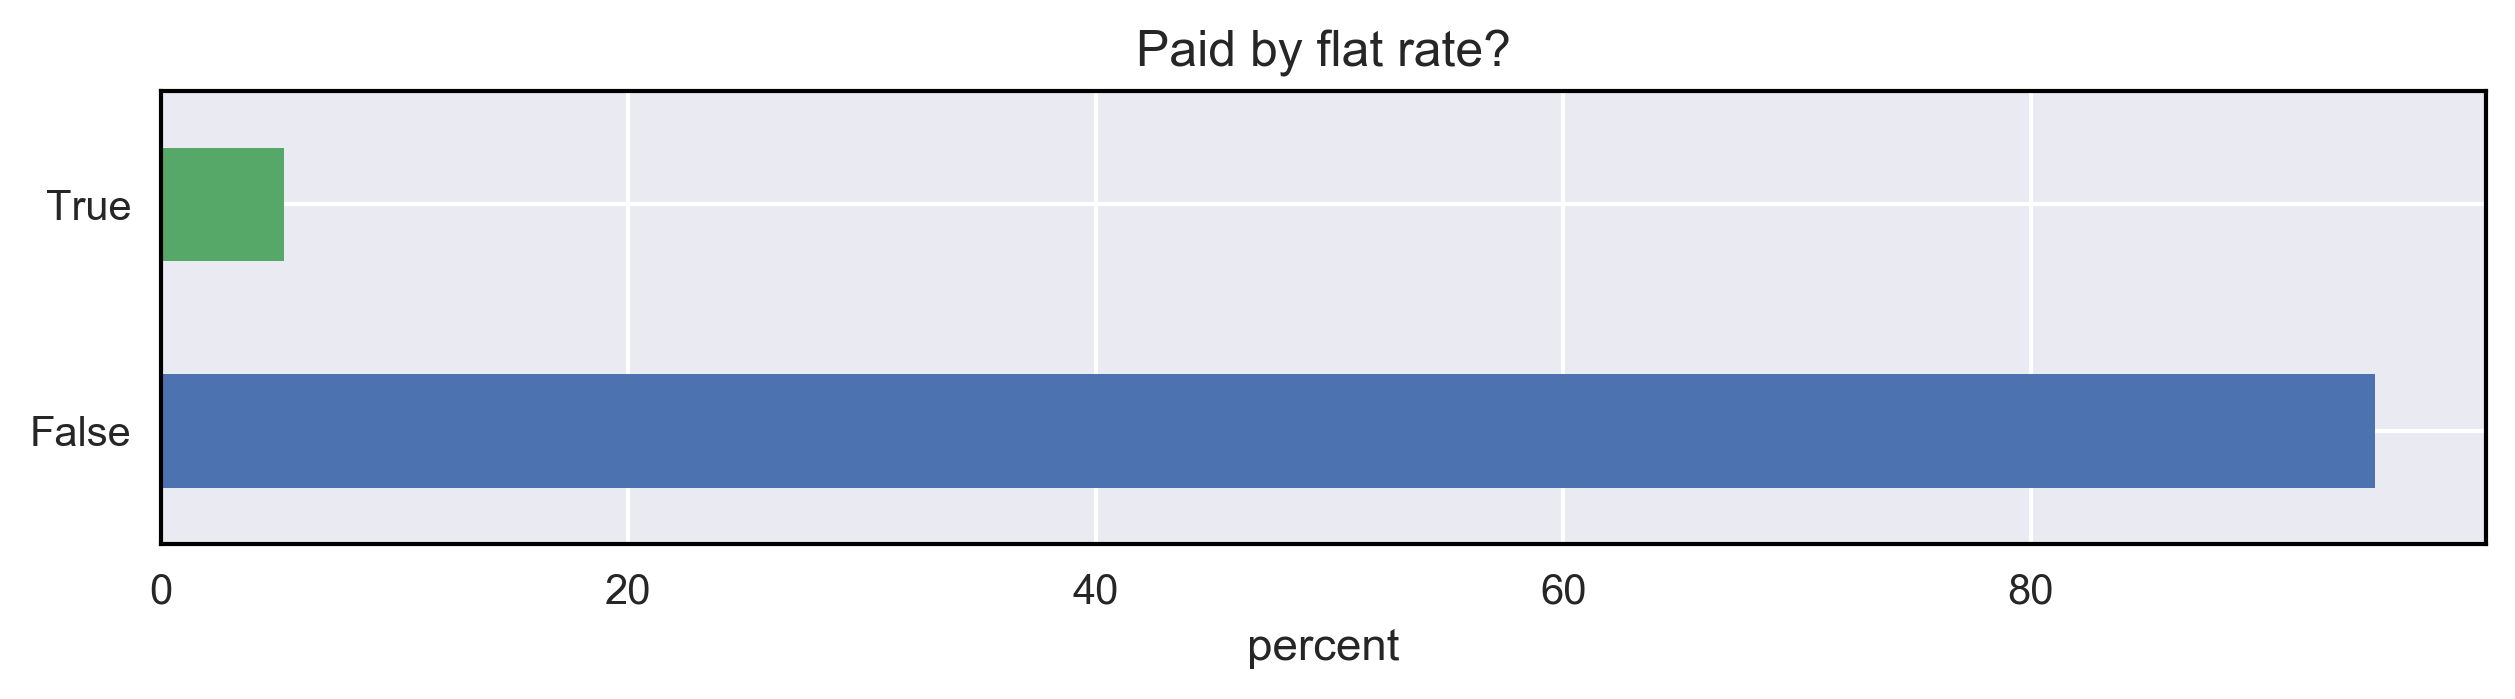

In [4]:
N = df.flatRate.count()
ax = (df.flatRate.value_counts()/N*100).plot(kind='barh', figsize=(10, 2), title='Paid by flat rate?')
ax.set_xlabel('percent')

In [5]:
num = ['totalPaid', 'wordRate', 'wordCount']

Text(0,0.5,'number of words')

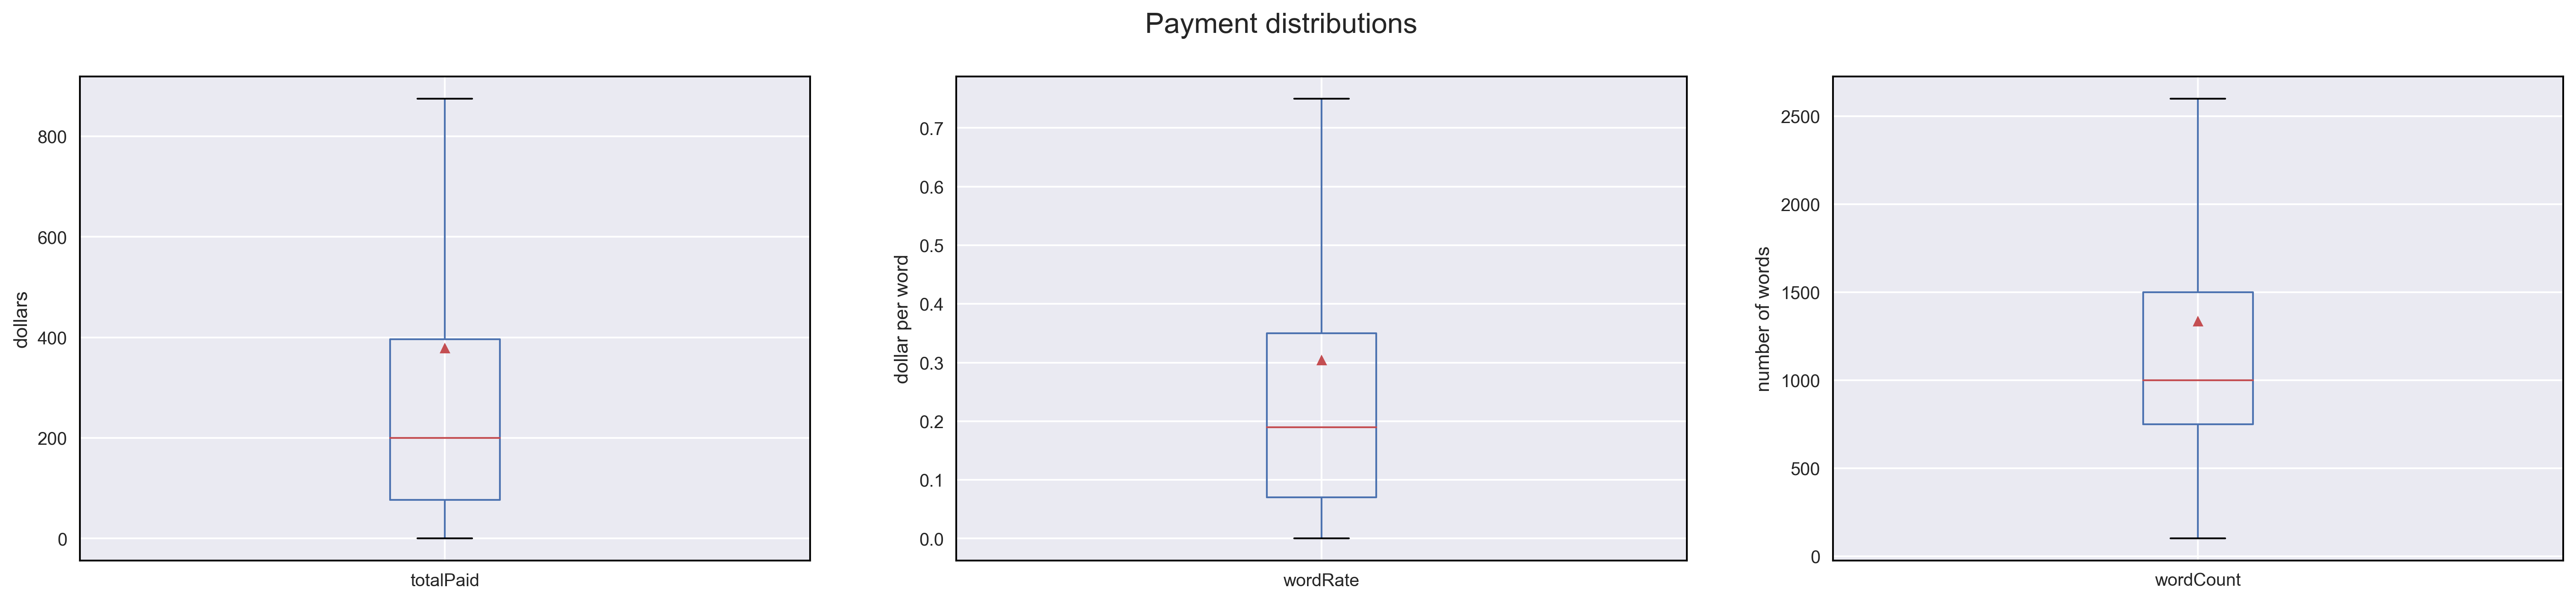

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 5))
fig.suptitle('Payment distributions', fontsize=16)
for i, s in enumerate(num):
    df[s].plot(kind='box', ax=axes[i], showfliers=False, showmeans=True)

axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')

## Two-variable distributions

### By year

Text(0,0.5,'number of words')

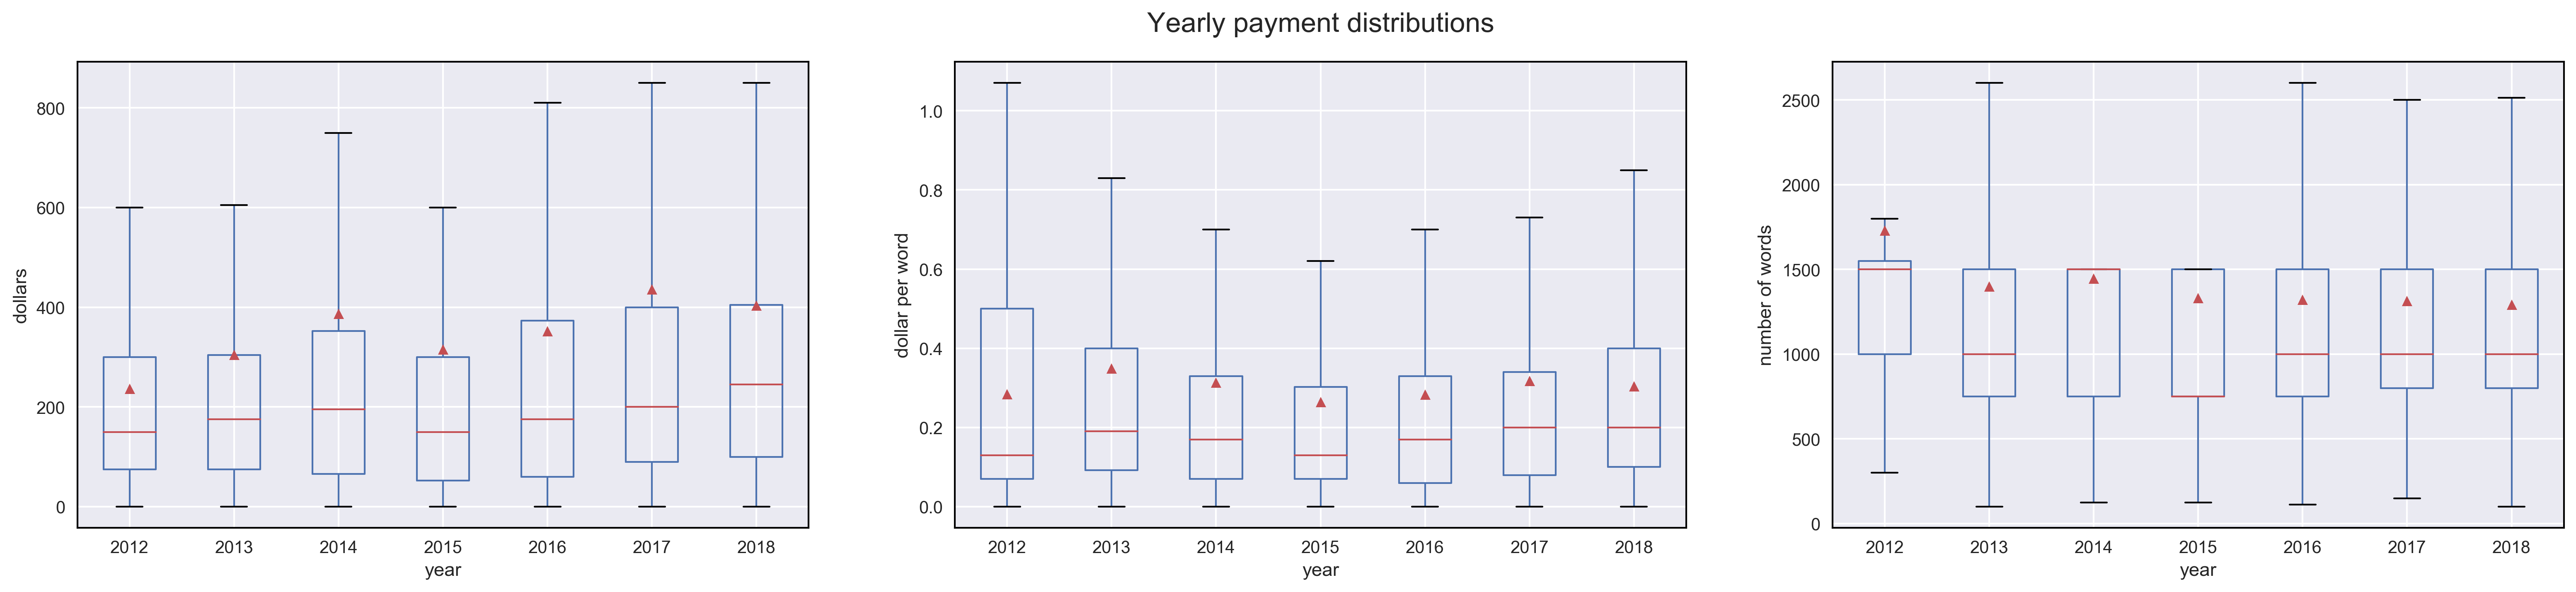

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='year', ax=axes[i], showfliers=False, showmeans=True)
    axes[i].set_title('')

fig.suptitle('Yearly payment distributions', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')

### By paymentDifficulty

Text(0,0.5,'number of words')

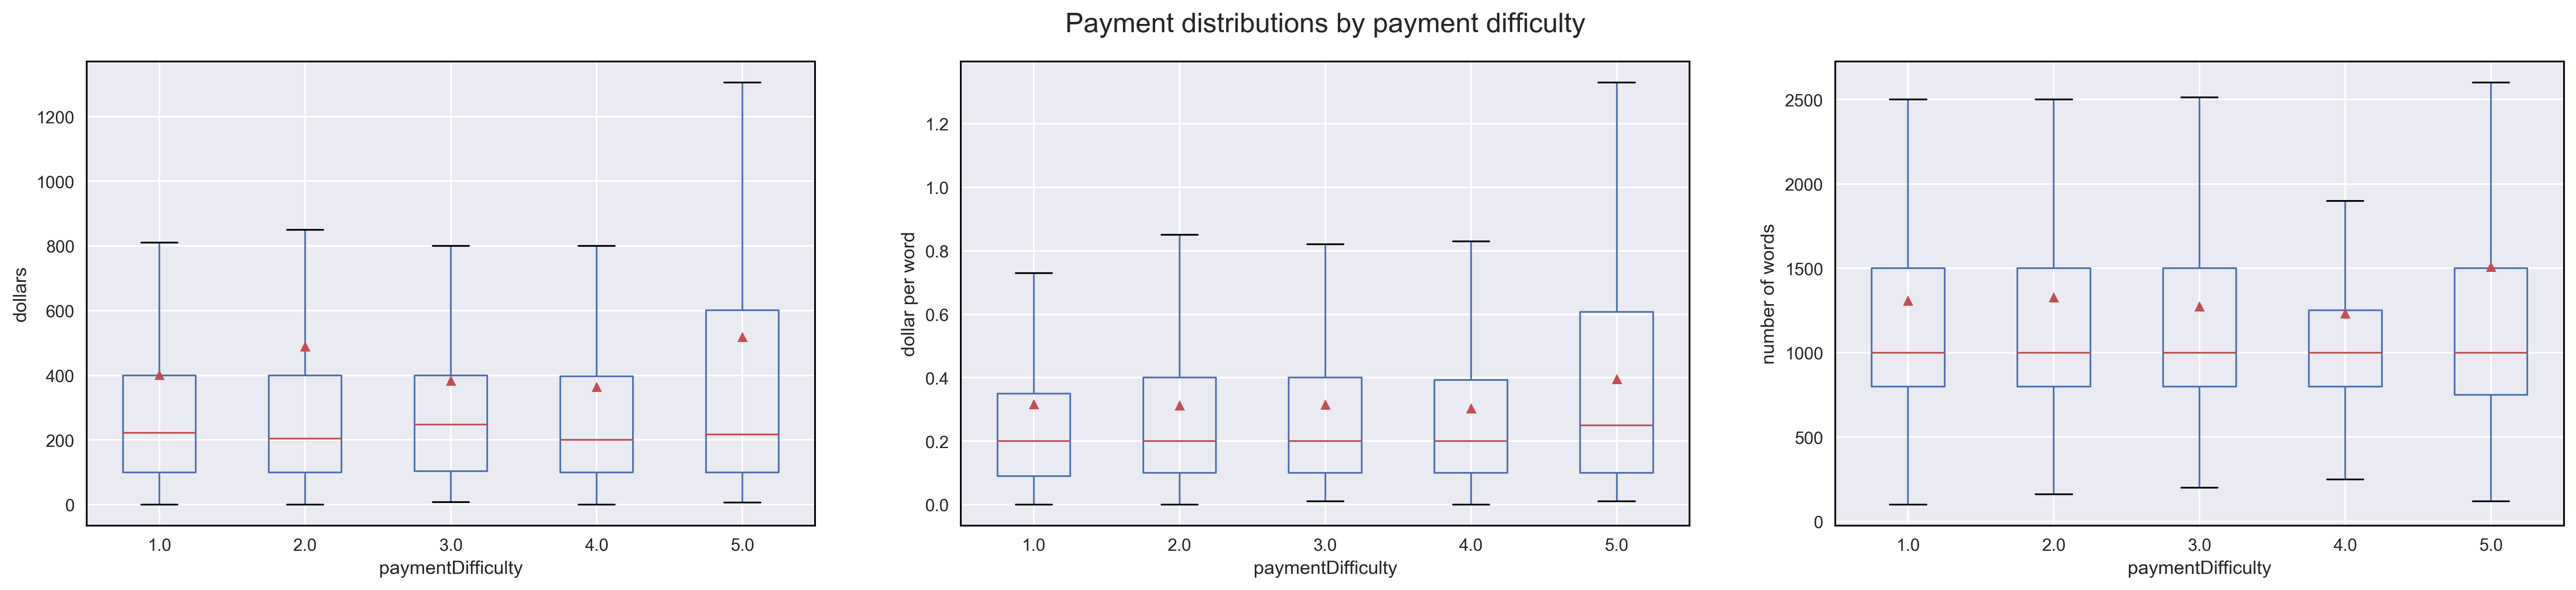

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='paymentDifficulty', ax=axes[i], showfliers=False, showmeans=True)
    axes[i].set_title('')

fig.suptitle('Payment distributions by payment difficulty', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By daysToBePaid

Text(0,0.5,'number of words')

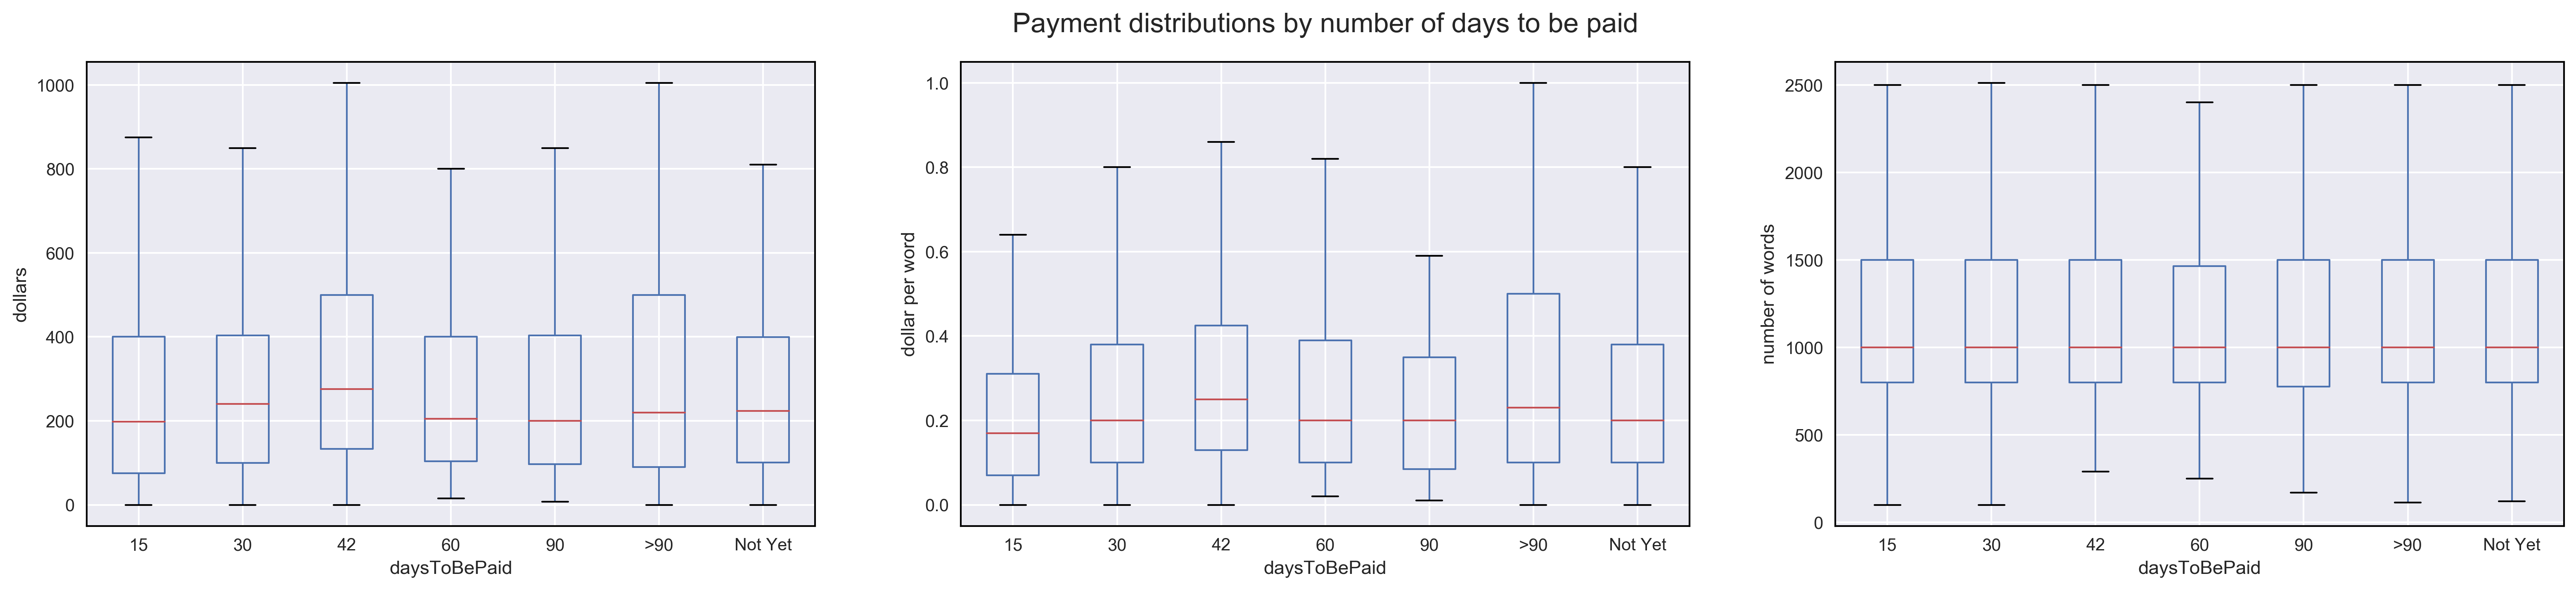

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='daysToBePaid', ax=axes[i], showfliers=False)
    axes[i].set_title('')

fig.suptitle('Payment distributions by number of days to be paid', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By storyType

Text(0,0.5,'number of words')

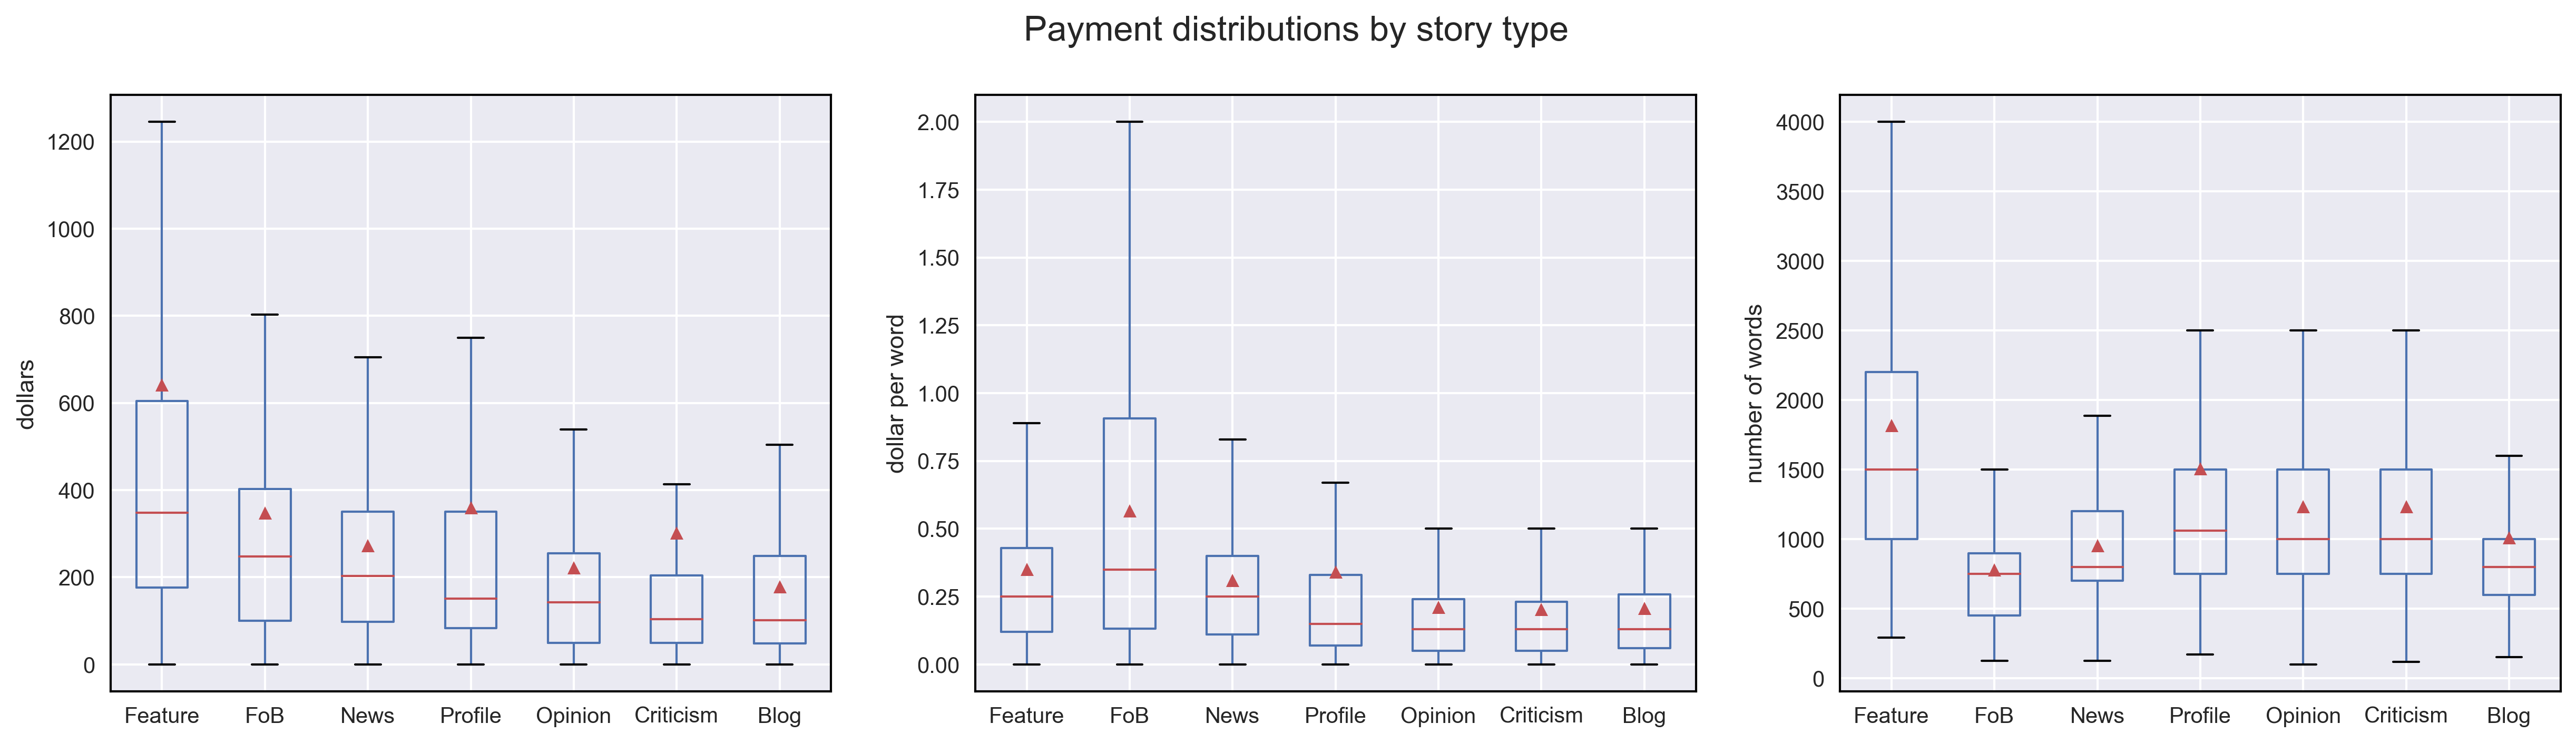

In [10]:
# wow thank you stack overflow
def boxplot_sorted(df, by, column, axe, med_ind=None):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values(ascending=False)
    # for multiple subplots, this option allows to sort by previous medians
    ind = meds.index if (med_ind is None) else med_ind
    df2[ind].boxplot(rot=0, showfliers=False, showmeans=True, ax=axe)
    return ind 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
ind = None
for i, s in enumerate(num):
    ind = boxplot_sorted(df, by='storyType', column=s, axe=axes[i], med_ind=ind)
    axes[i].set_title('')

fig.suptitle('Payment distributions by story type', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')

### By levelOfReporting

Text(0,0.5,'number of words')

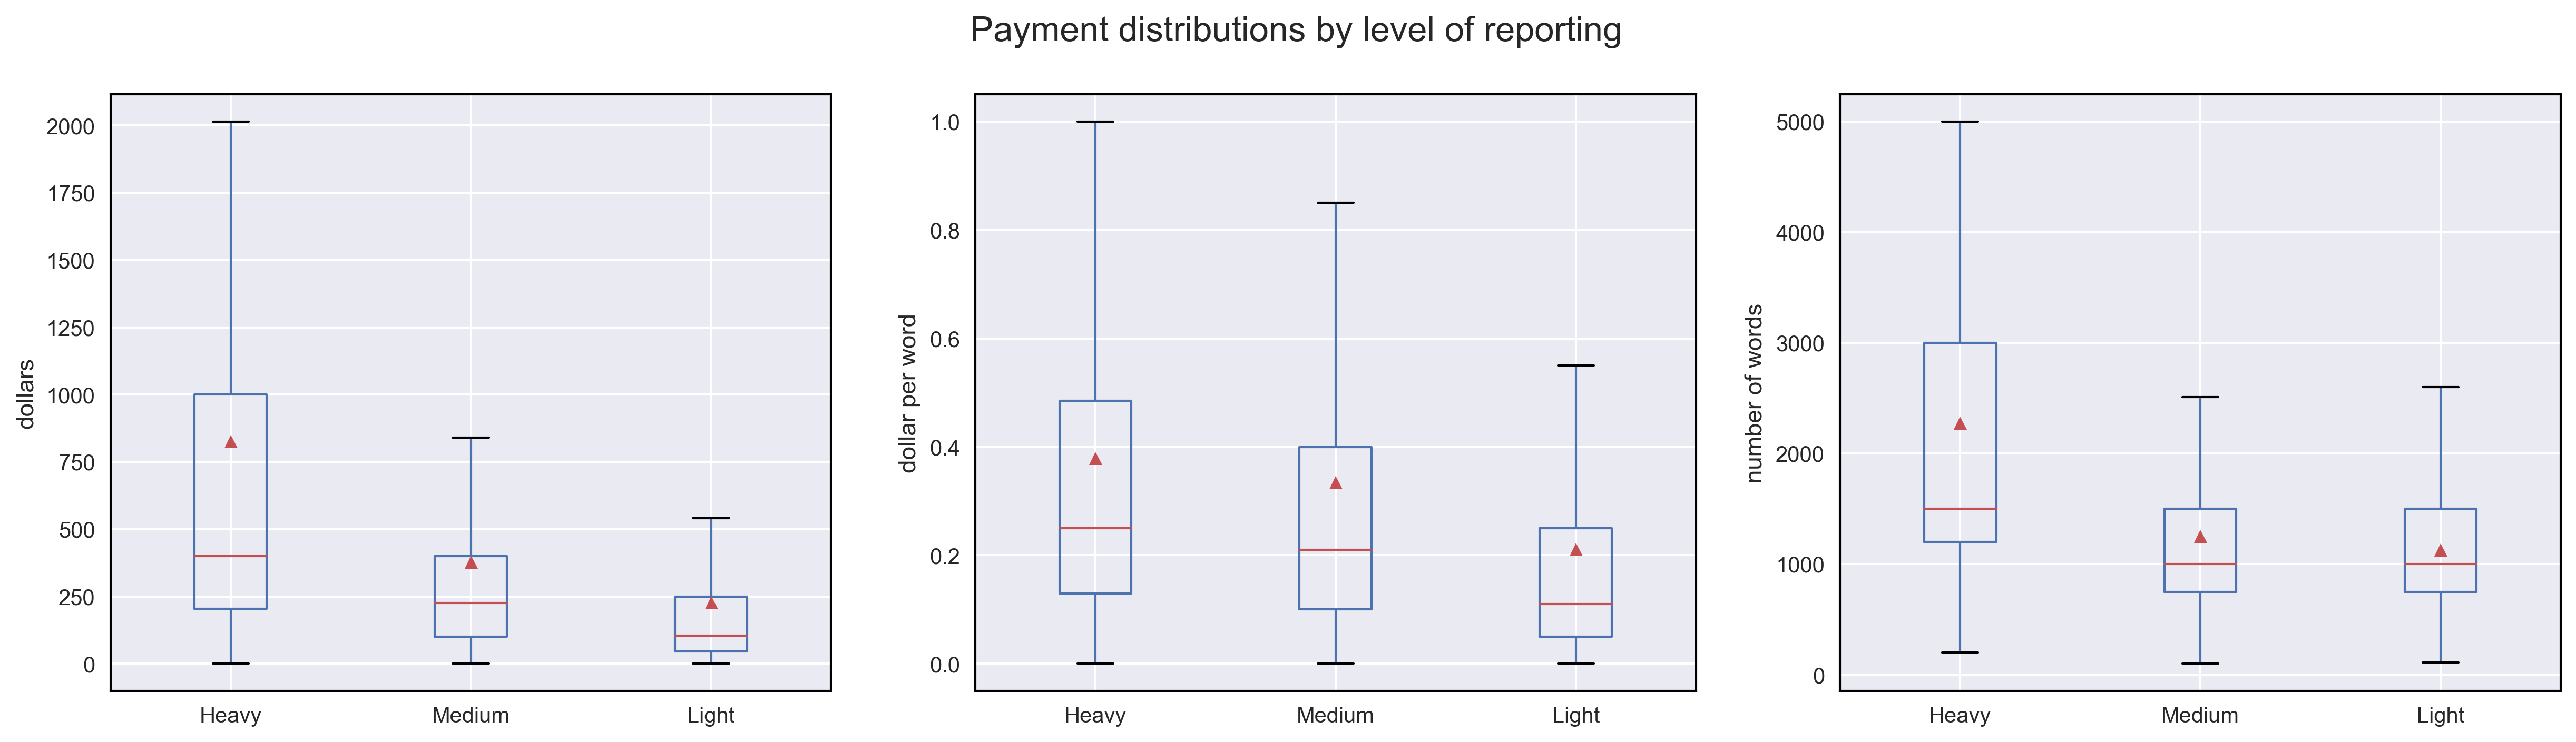

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
for i, s in enumerate(num):
    boxplot_sorted(df, by='levelOfReporting', column=s, axe=axes[i])
    axes[i].set_title('')

fig.suptitle('Payment distributions by level of reporting', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By relationship

Text(0,0.5,'number of words')

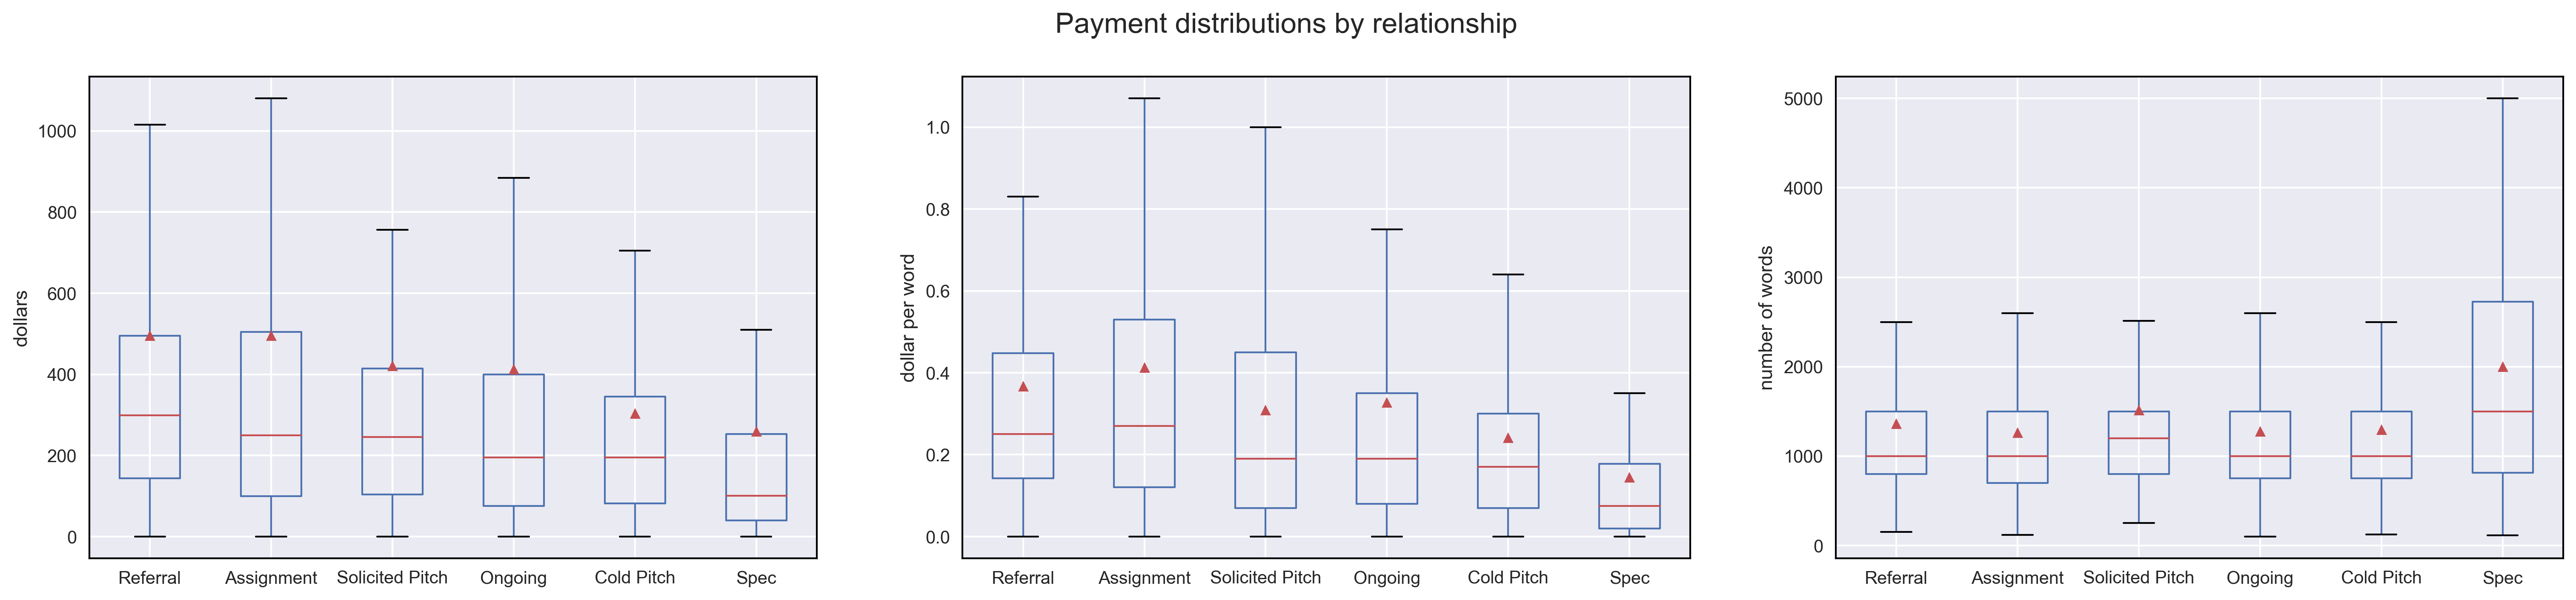

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 5))
ind = None
for i, s in enumerate(num):
    ind = boxplot_sorted(df, by='relationship', column=s, axe=axes[i], med_ind=ind)
    axes[i].set_title('')

fig.suptitle('Payment distributions by relationship', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By rights

Text(0,0.5,'number of words')

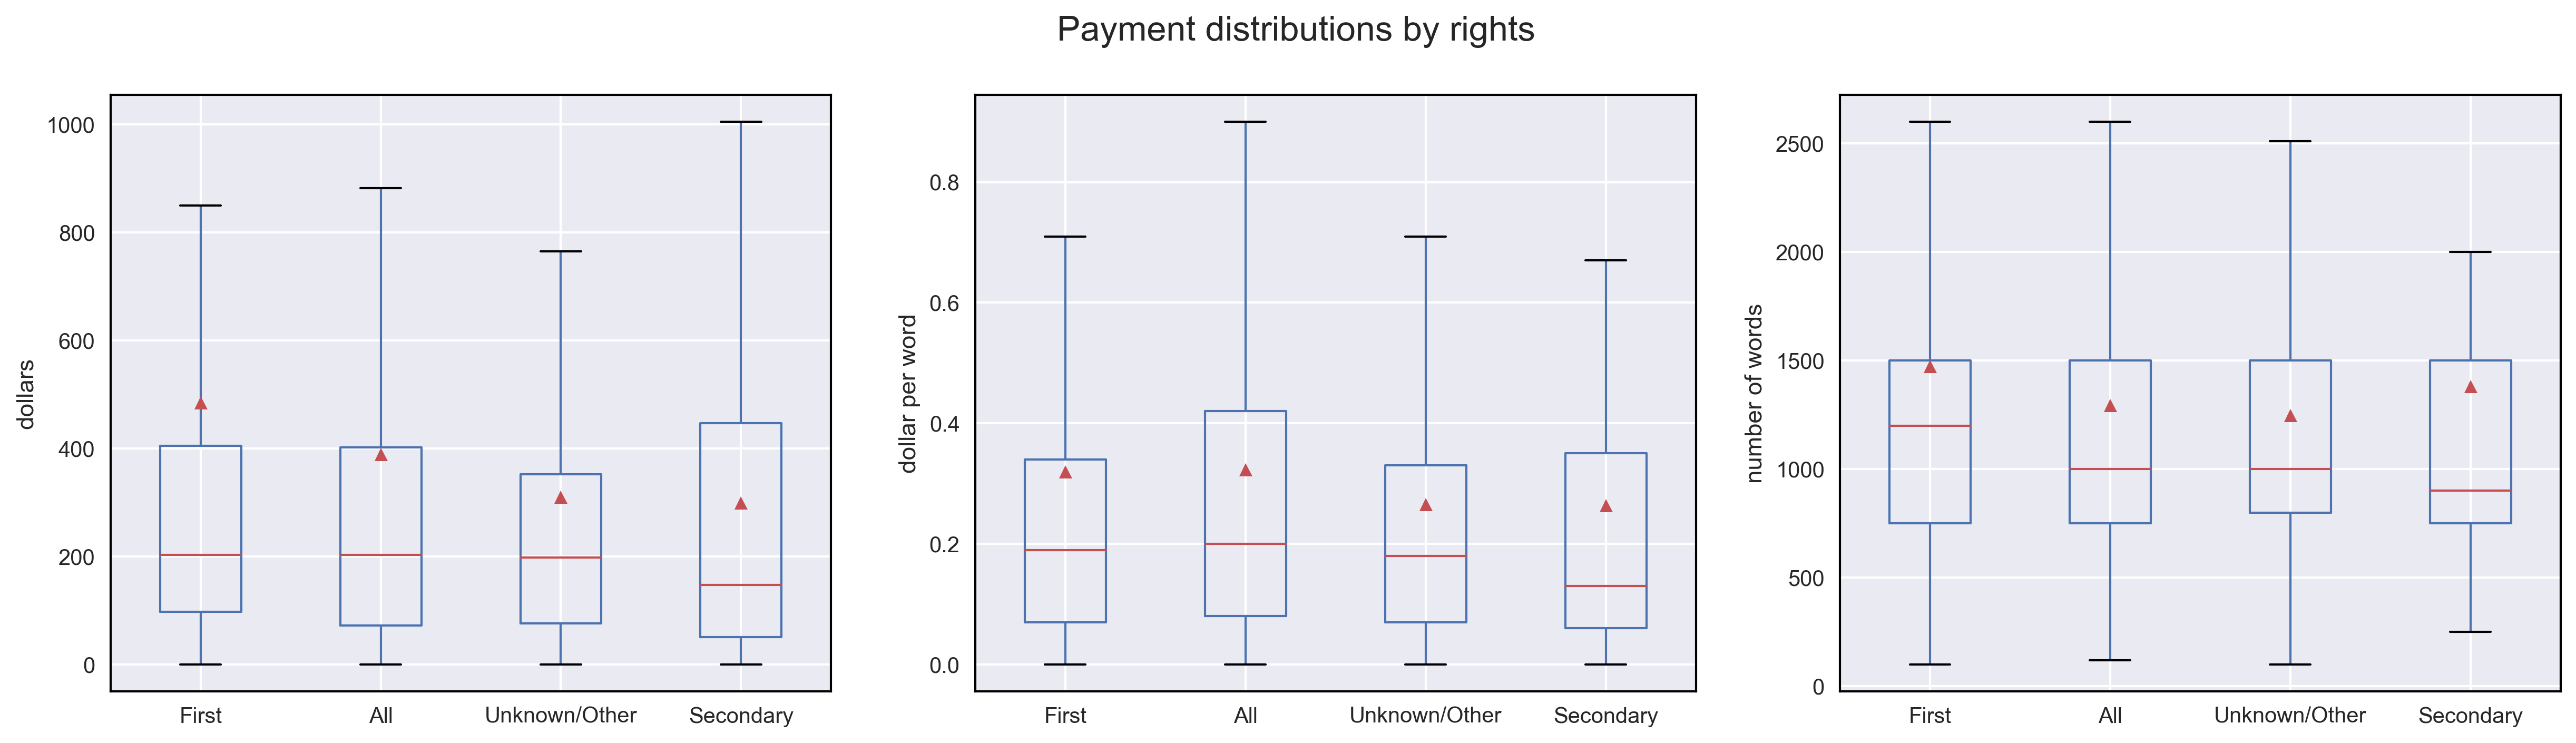

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
ind = None
for i, s in enumerate(num):
    ind = boxplot_sorted(df, by='rights', column=s, axe=axes[i], med_ind=ind)
    axes[i].set_title('')

fig.suptitle('Payment distributions by rights', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By platform

Text(0,0.5,'number of words')

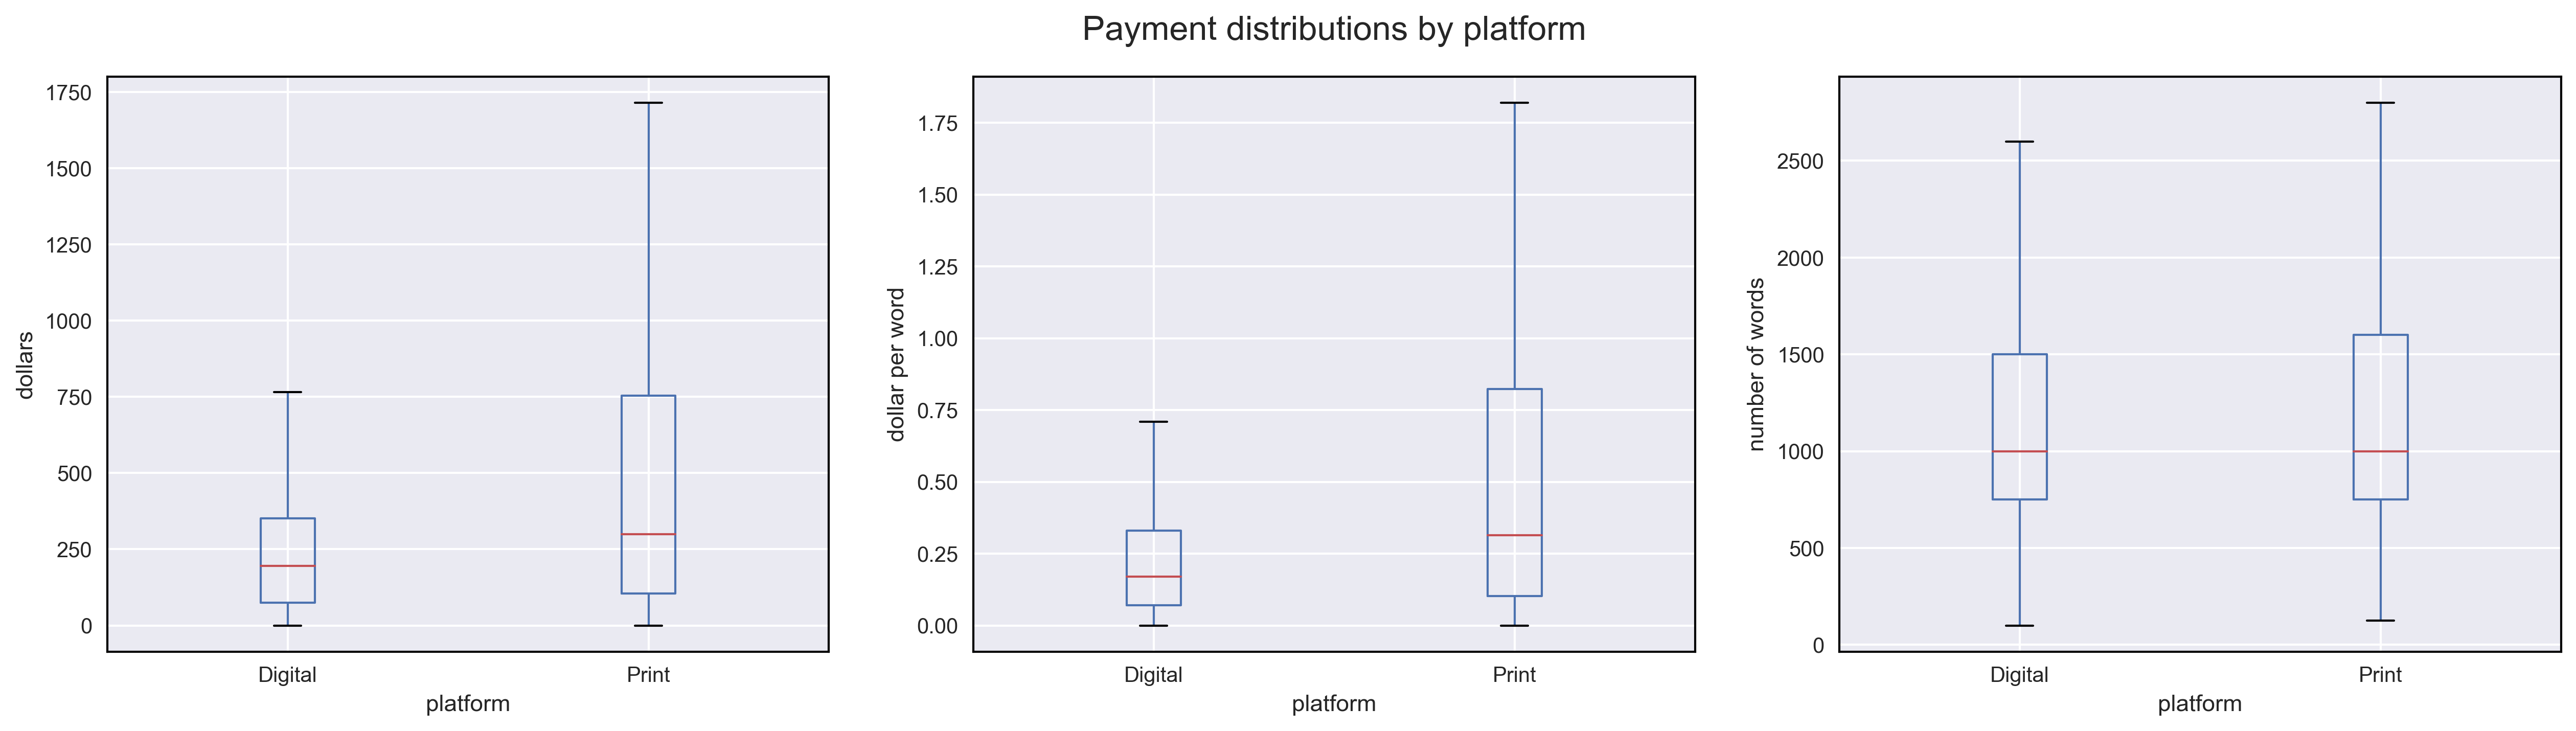

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='platform', ax=axes[i], showfliers=False, rot=0)
    axes[i].set_title('')

fig.suptitle('Payment distributions by platform', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By contract

Text(0,0.5,'number of words')

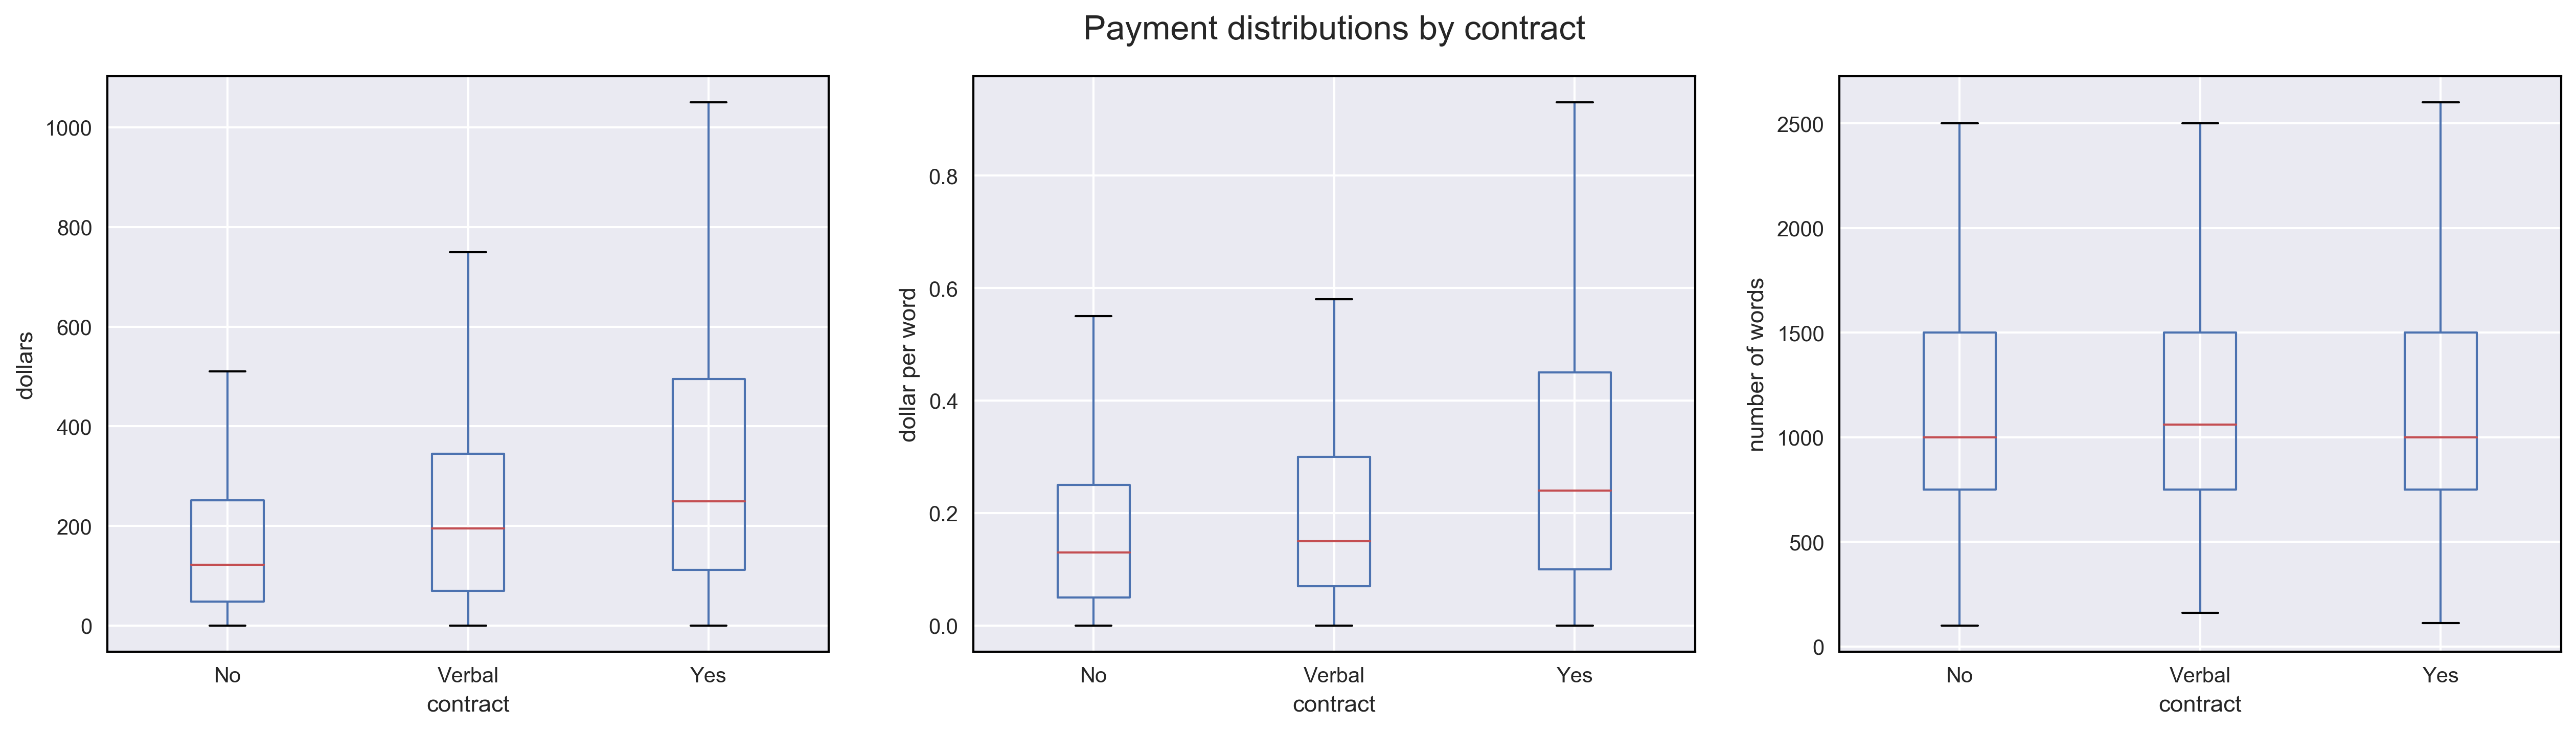

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='contract', ax=axes[i], showfliers=False, rot=0)
    axes[i].set_title('')

fig.suptitle('Payment distributions by contract', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


***
# Categorical data

## Independent distributions

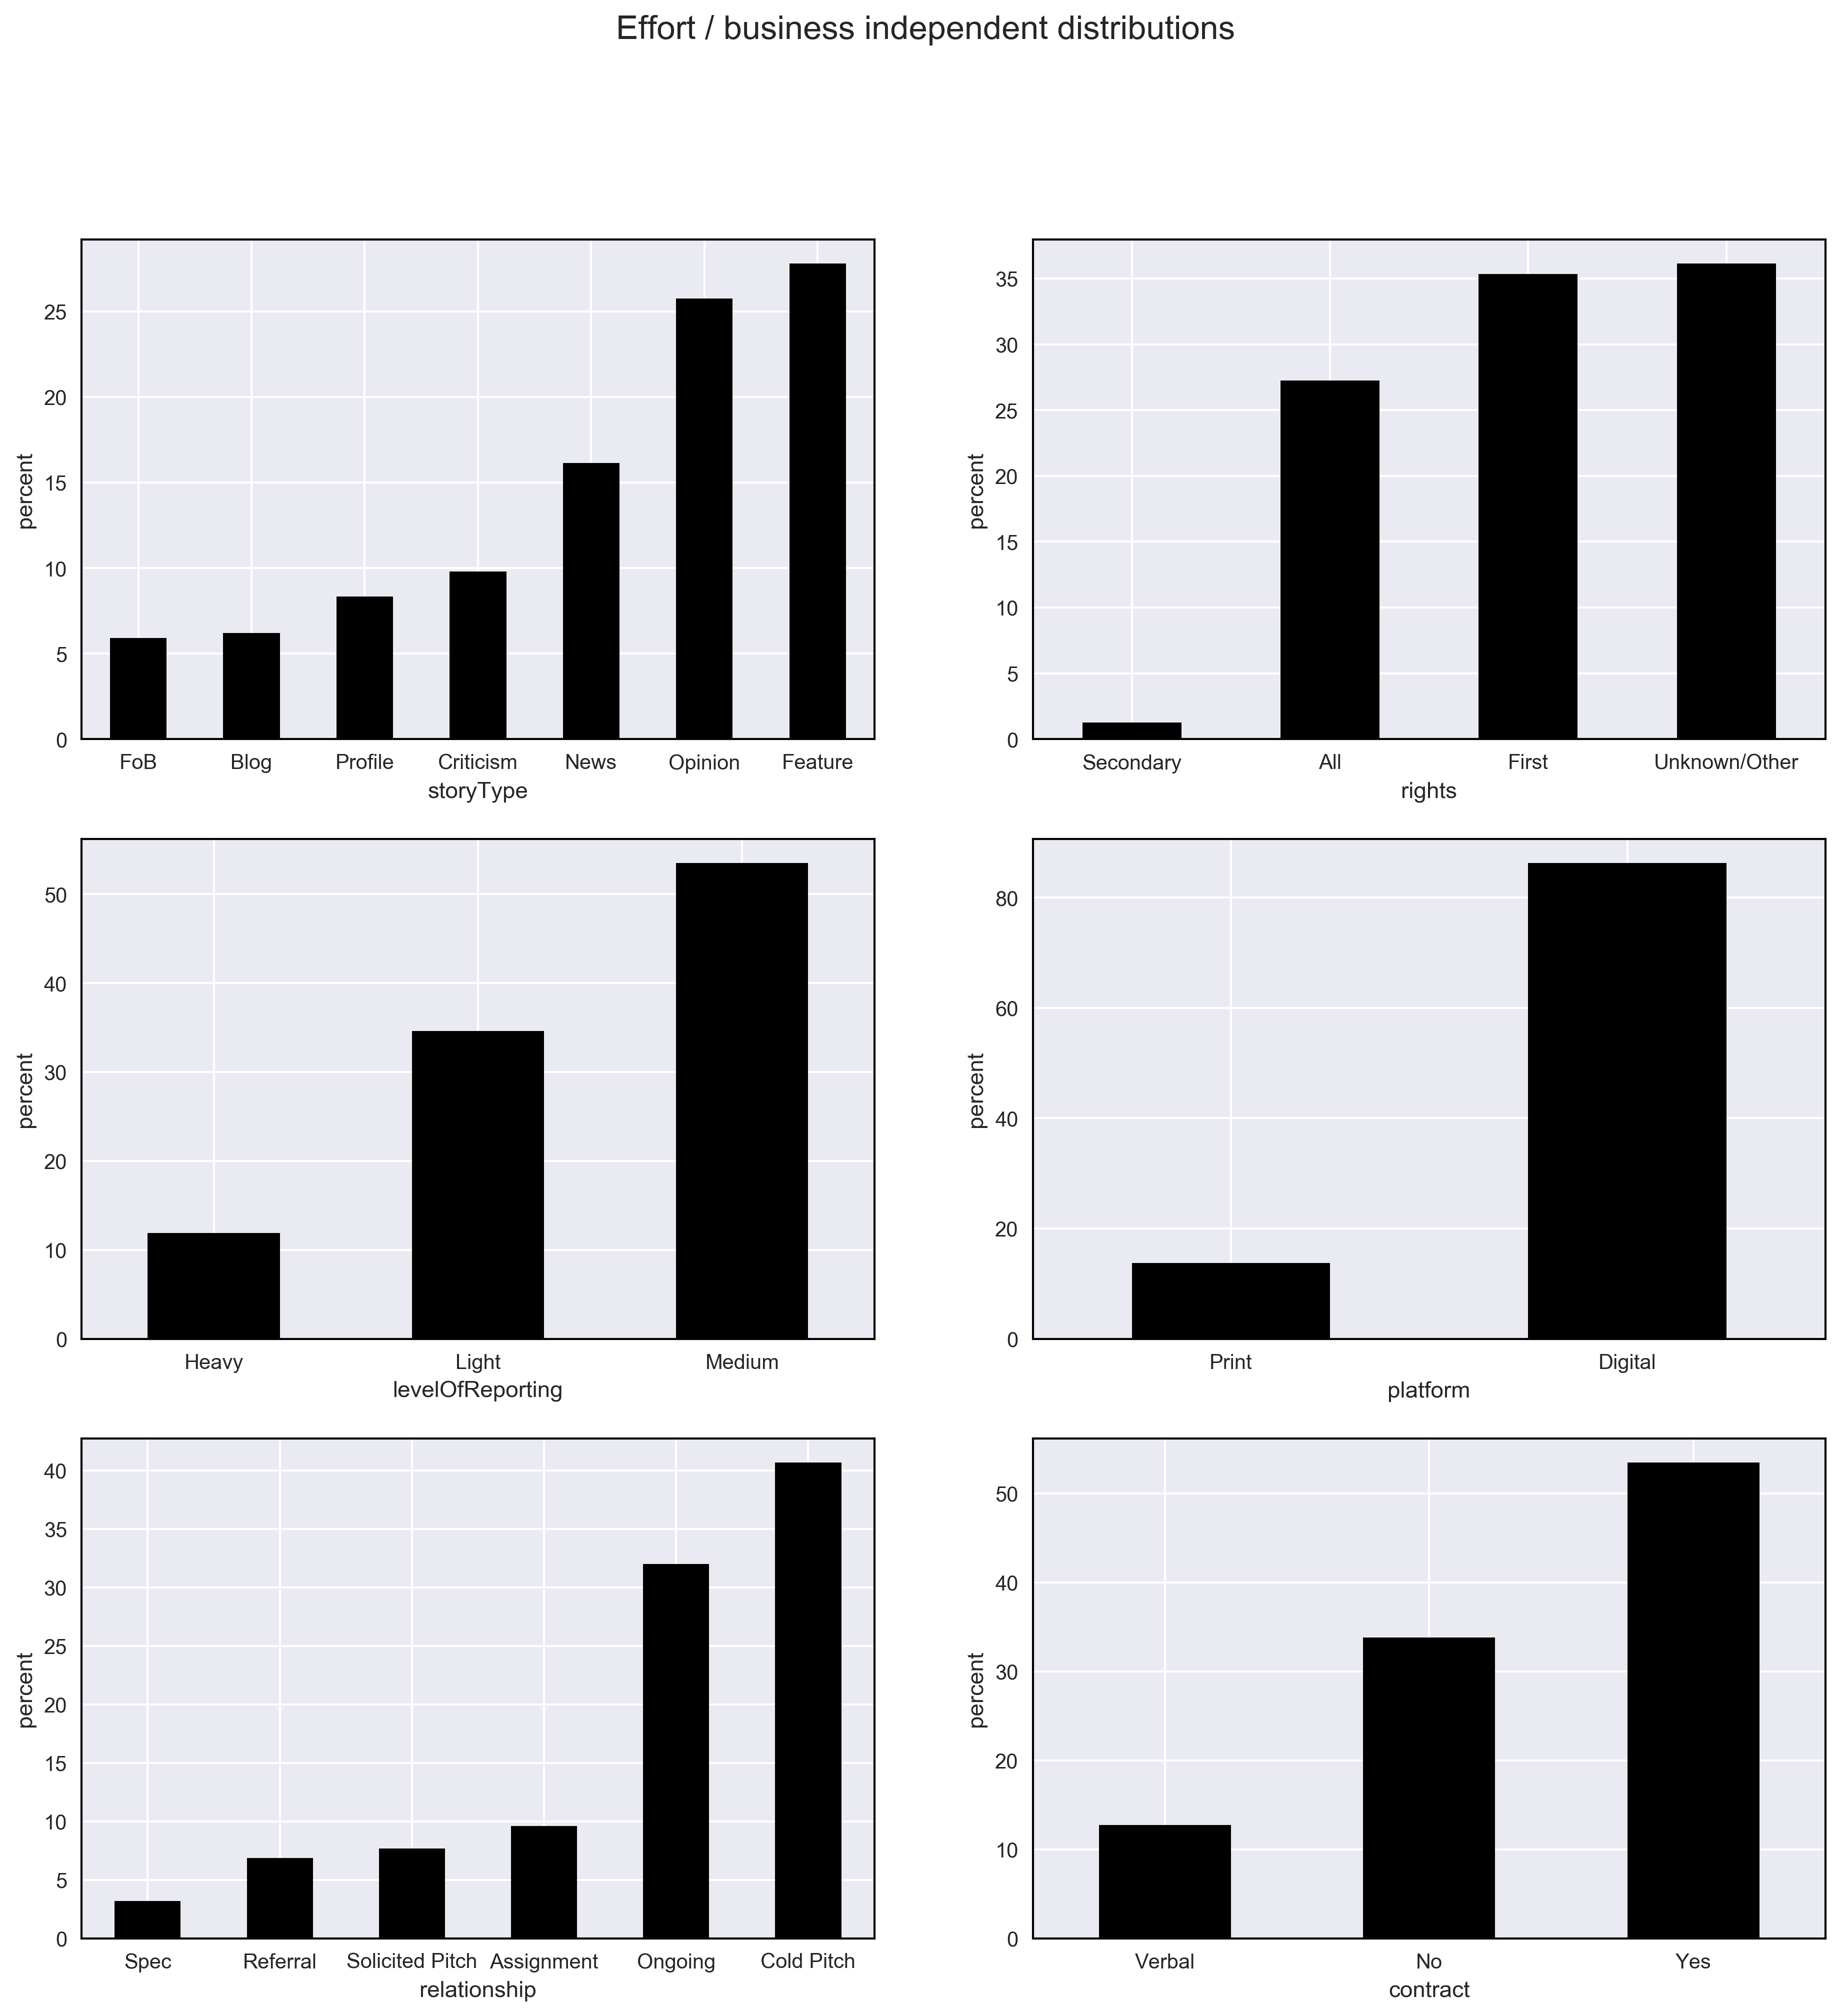

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (15, 15))
fig.suptitle("Effort / business independent distributions", fontsize=16)

eb1 = ['storyType', 'levelOfReporting', 'relationship']
eb2 = ['rights', 'platform', 'contract']
for i, p in enumerate(eb1):
    norm = df[p].count()
    ax1 = (df.groupby(p)[p].count().sort_values()/norm*100).plot(
        kind='bar', ax=axes[i, 0], rot=0, color='k')
    ax1.set_ylabel('percent')
for i, p in enumerate(eb2):
    norm = df[p].count()
    ax2 = (df.groupby(p)[p].count().sort_values()/norm*100).plot(
        kind='bar', ax=axes[i, 1], rot=0, color='k')
    ax2.set_ylabel('percent')


daysToBePaid
15     27.287946
30     37.555804
42     13.783482
60     10.435268
90      6.194196
>90     4.743304
Name: daysToBePaid, dtype: float64


Text(0,0.5,'percent')

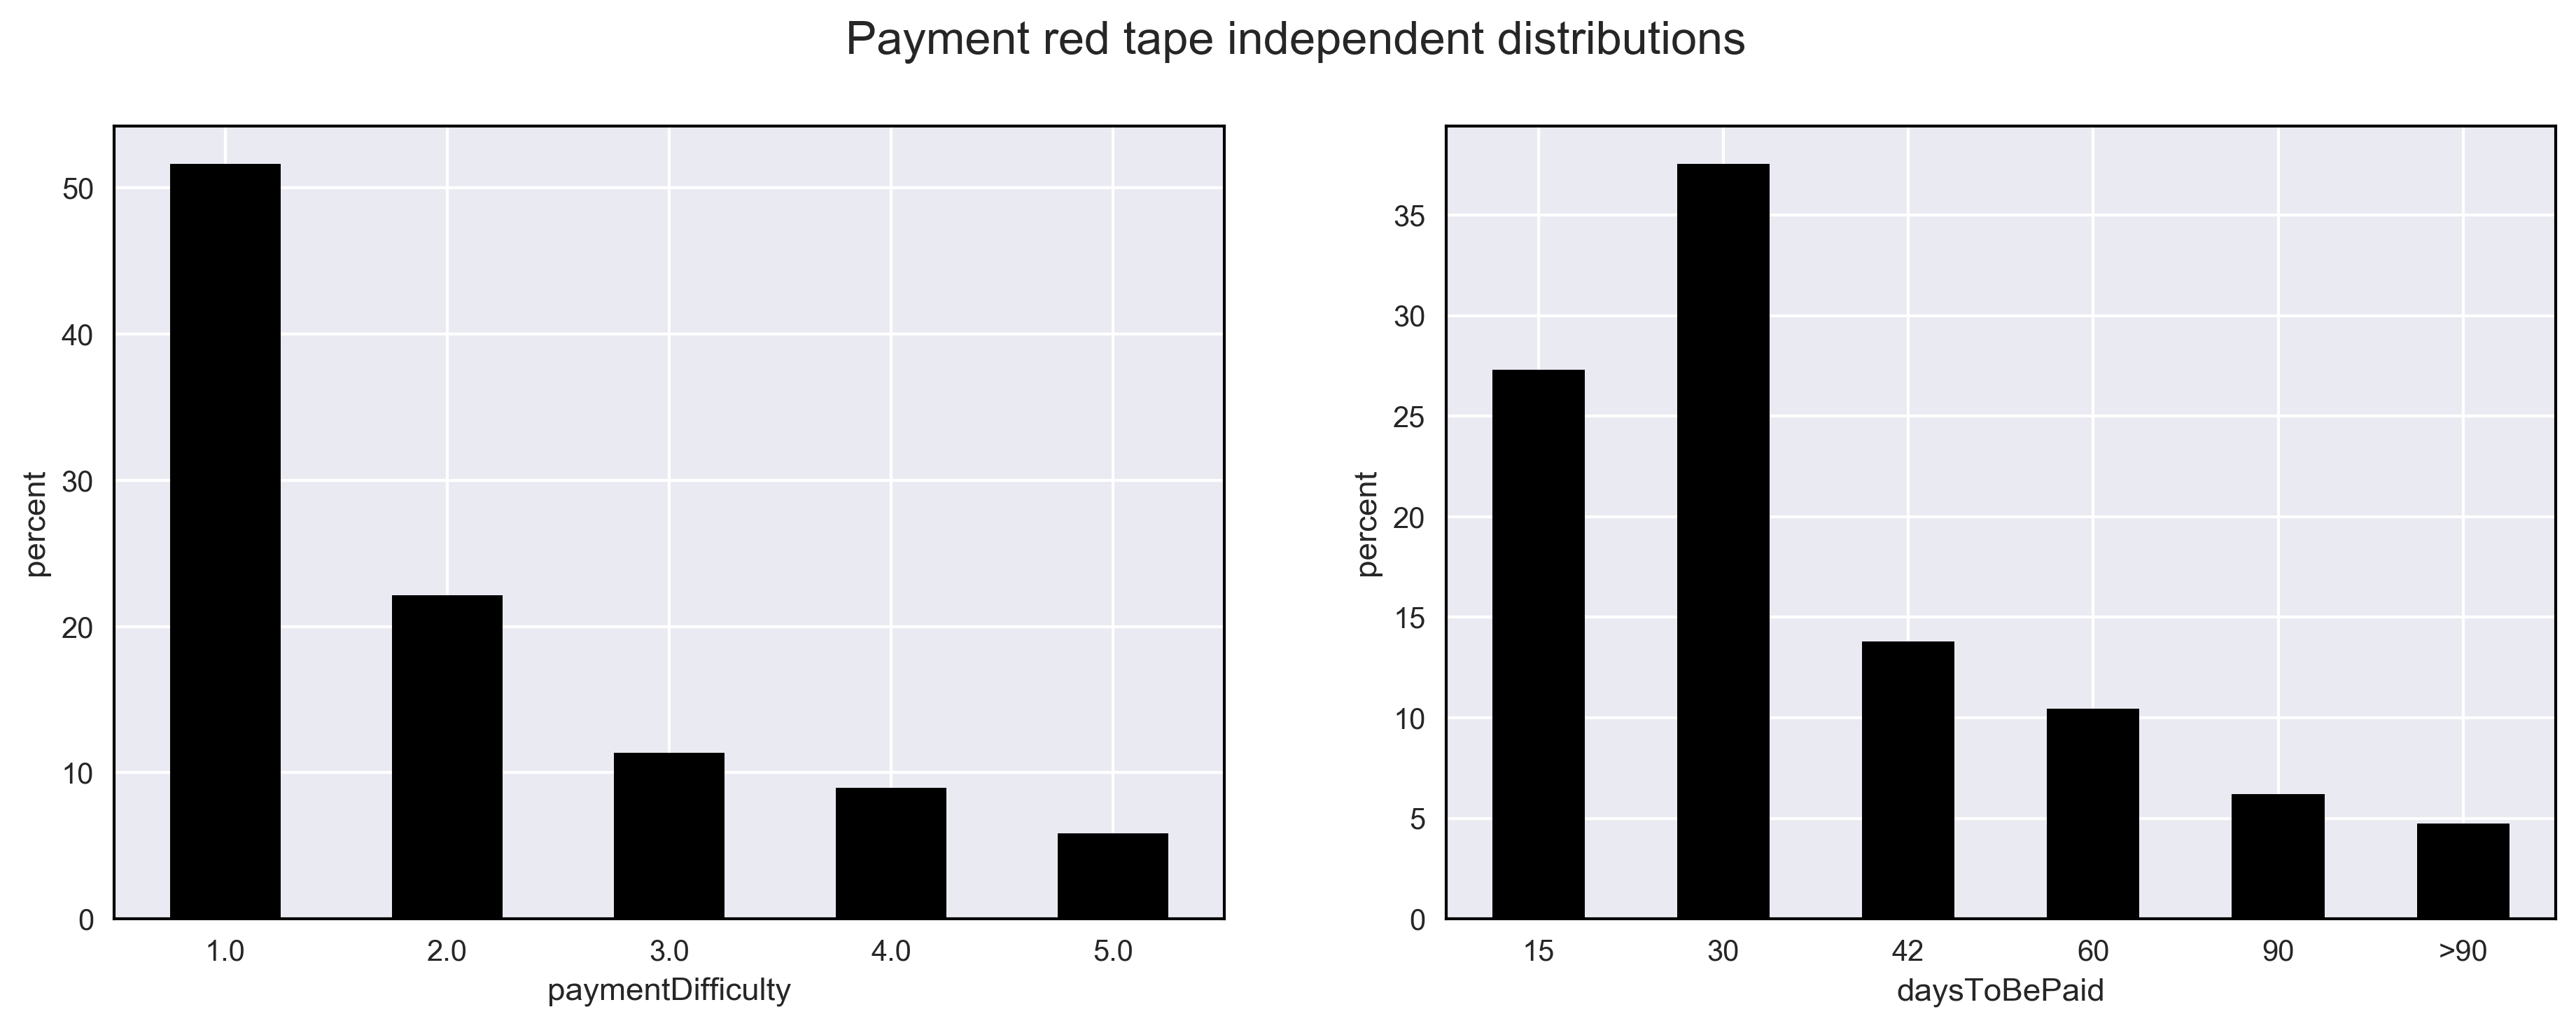

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

n1 = df['paymentDifficulty'].count()
df_ny = df[df['daysToBePaid'] != 'Not Yet']
n2 = df_ny['daysToBePaid'].count()

(df.groupby('paymentDifficulty')['paymentDifficulty'].count()/n1*100).plot(kind='bar',  ax=axes[0], color='k', rot=0)
(df_ny.groupby('daysToBePaid')['daysToBePaid'].count()/n2*100).plot(kind='bar', ax=axes[1], color='k', rot=0)
print(df_ny.groupby('daysToBePaid')['daysToBePaid'].count()/n2*100)
fig.suptitle('Payment red tape independent distributions', fontsize=16)
axes[0].set_ylabel('percent')
axes[1].set_ylabel('percent')

## Two-variable distributions

In [18]:
def create_stacked(df, column, by, axes, sort_by=None, palette=sns.color_palette("coolwarm", 7)):
    uq = sorted(df[column].dropna().unique(), reverse=True)
    di = {}
    for u in uq:
        df_n = df[df[column] == u]
        N = df_n[by].count()
        di[u] = dict(df_n.groupby(by)[by].count() / N * 100)

    df_t = pd.DataFrame(di)
    df_tT = df_t.T
    if not sort_by is None:
        df_tT.sort_values(by=[sort_by], inplace=True)
    axes.set_xlim(0, 100)  
    df_tT.plot(kind='barh', stacked=True, rot=0,
                 colormap=ListedColormap(palette), ax=axes)
    axes.legend(frameon=True)

### By year

Payment difficulty and pay wait was only added four years ago. Results are inconclusive

Text(0.5,0,'percent rights')

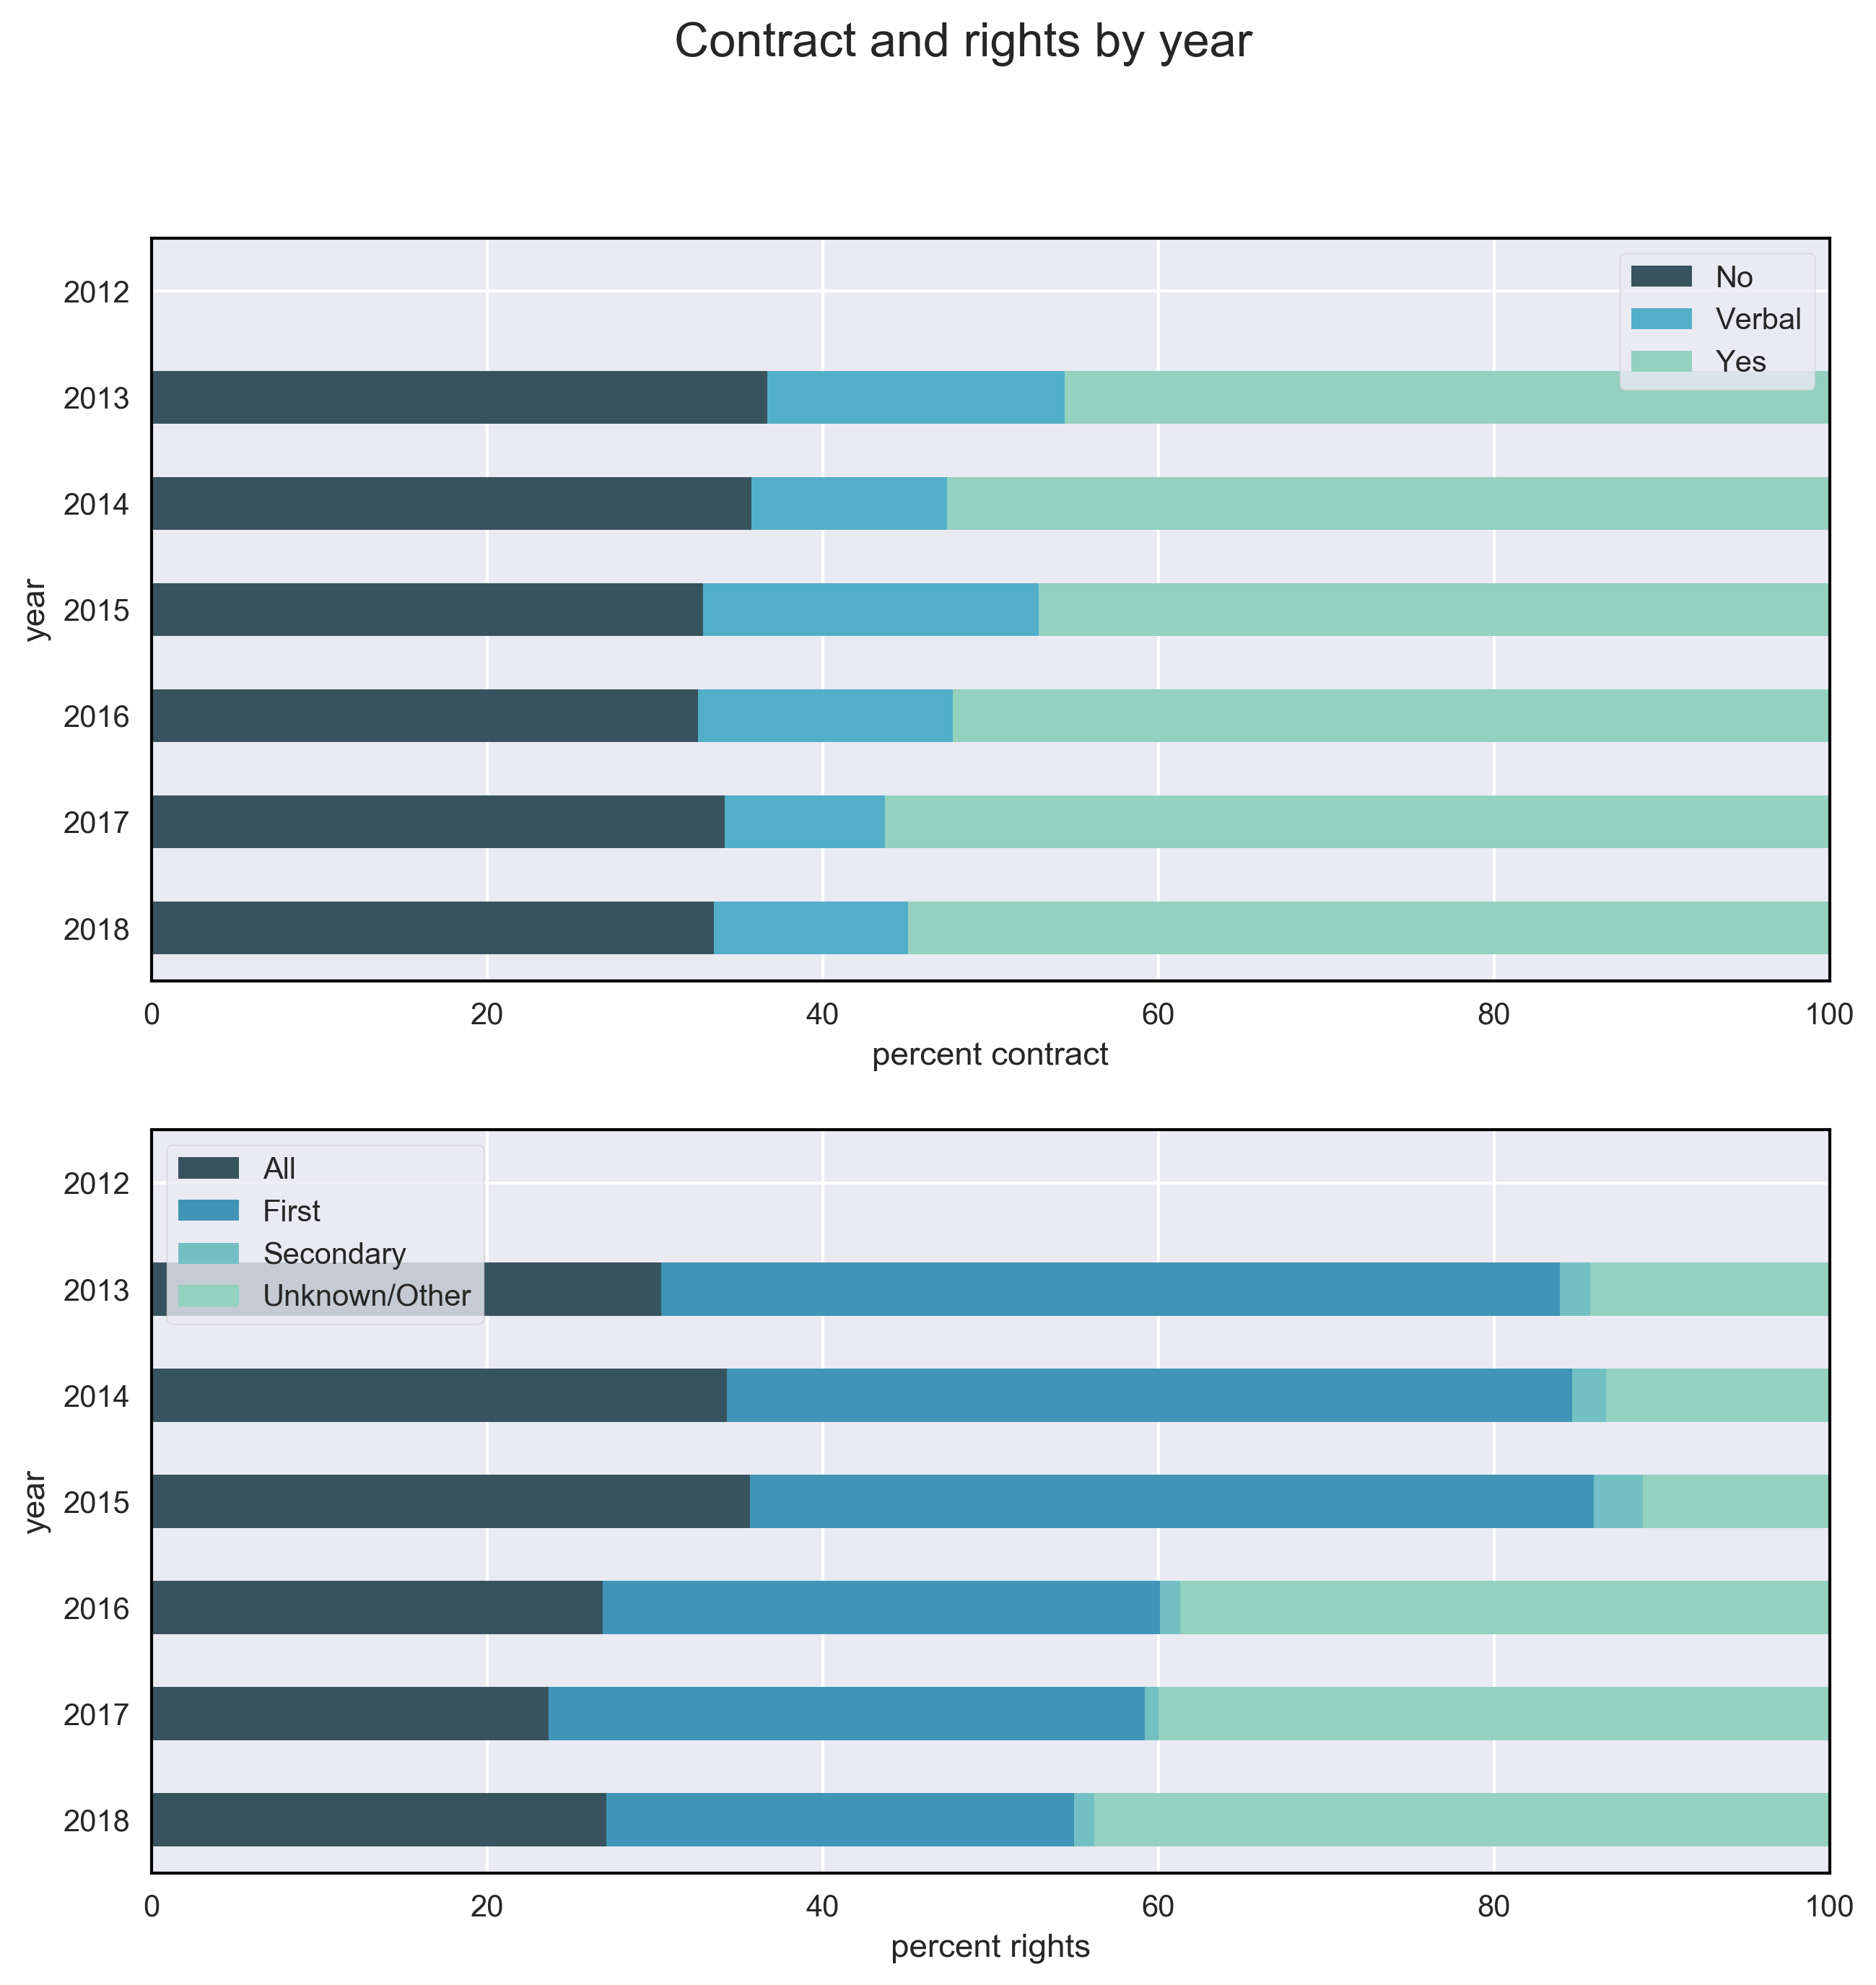

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10, 10))

create_stacked(df, column='year', by='contract', axes=ax[0], palette=sns.color_palette("GnBu_d"))
create_stacked(df, column='year', by='rights', axes=ax[1], palette=sns.color_palette("GnBu_d"))

fig.suptitle('Contract and rights by year', fontsize=16)

ax[0].set_ylabel('year')
ax[1].set_ylabel('year')
ax[0].set_xlabel('percent contract')
ax[1].set_xlabel('percent rights')

### By storyType

Text(0.5,1,'Days to be paid by story type')

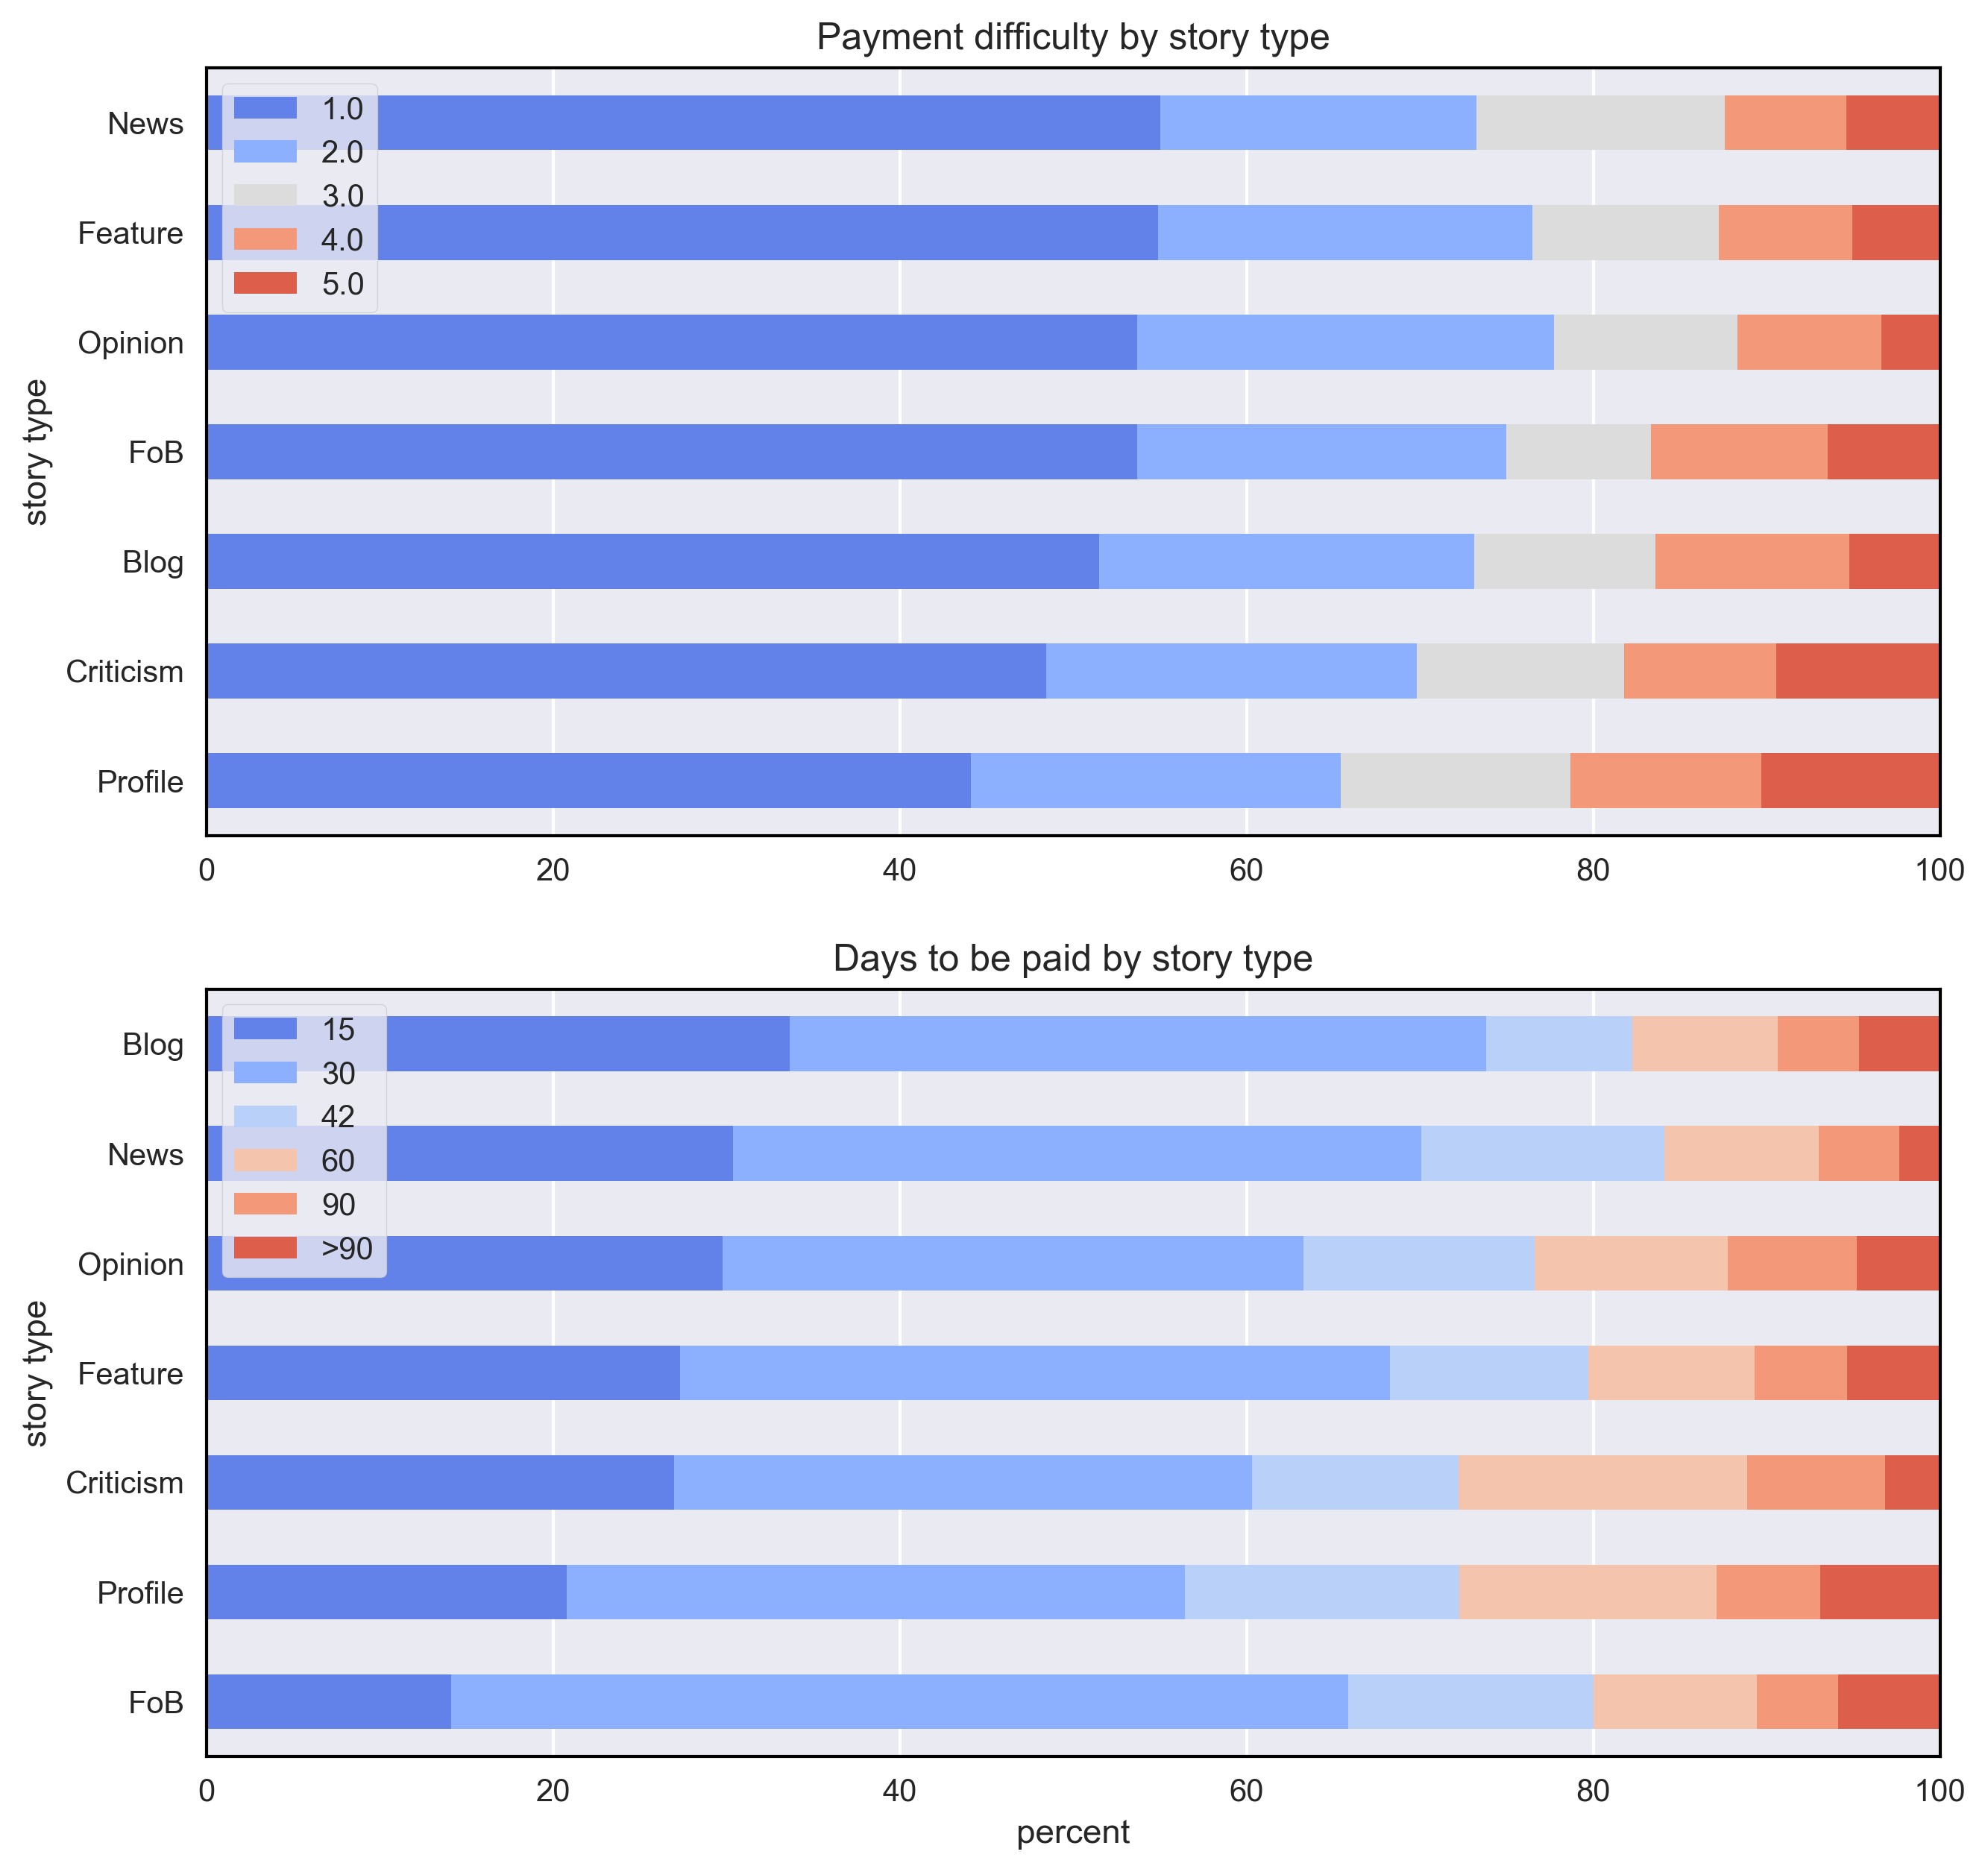

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10, 10))
create_stacked(df, column='storyType', by='paymentDifficulty', sort_by=1.0, axes=ax[0])
create_stacked(df.replace('Not Yet', np.nan), column='storyType', by='daysToBePaid', sort_by='15', axes=ax[1])

ax[1].set_xlabel('percent')
ax[0].set_ylabel('story type')
ax[1].set_ylabel('story type')
ax[0].set_title('Payment difficulty by story type')
ax[1].set_title('Days to be paid by story type')


### By relationship

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10, 10))
create_stacked(df, column='relationship', by='paymentDifficulty', sort_by=1.0, axes=ax[0])
create_stacked(df.replace('Not Yet', np.nan), column='relationship', by='daysToBePaid', sort_by='15', axes=ax[1])

ax[1].set_xlabel('percent')
ax[0].set_ylabel('relationship')
ax[1].set_ylabel('relationship')
ax[0].set_title('Payment difficulty by relationship')
ax[1].set_title('Days to be paid by relationship')

Text(0.5,1,'Days to be paid by relationship')

Ignoring the following questions:

* pay red tape v levelOfReporting
* pay red tape v rights
* pay red tape v contract
* pay red tape v platform

I can't imagine those having interesting results

# Other Questions

## What's the pay distributions for exclusively print articles?

In [22]:
df_print = df[df['platform'] == 'Print']
print('Working with subset of {} submissions'.format(df_print.shape[0]))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
df_print.boxplot(column='wordRate', by='storyType', ax=ax, showfliers=False, showmeans=True)
ax.set_title('Word rate for print stories')
fig.suptitle('')
ax.set_ylabel('dollar per word')

Working with subset of 429 submissions


Text(0,0.5,'dollar per word')

## Rank Publications

In [23]:
high_submissions = df.groupby('publication').size() > 7 # an arbitrary cutoff
high_submissions = high_submissions[high_submissions == True]
high_submissions = list(high_submissions.keys())
df_hs = df[df['publication'].isin(high_submissions)]
df_hs.shape

(1104, 15)

In [24]:
df_hs.replace('>90', 110, inplace=True)
df_hs.replace('Not Yet', np.nan, inplace=True)
df_hs['daysToBePaid'] = df_hs['daysToBePaid'].astype(float)
summary_df = df_hs.groupby('publication')['totalPaid', 'wordRate', 'daysToBePaid', 'paymentDifficulty'].median()
summary_df.dropna(inplace=True)
summary_df.head()

totalPaid  wordRate  daysToBePaid  paymentDifficulty
publication                                                             
Al-jazeera English     495.00      0.42          42.0                2.0
Almost Fearless        152.00      0.13         110.0                5.0
Alternet               250.00      0.17          76.0                3.5
Are We Europe          120.00      0.06          30.0                1.5
Artforum               123.67      0.36          30.0                1.0

In [25]:
def normalize(l):
    return (l - l.mean()) / (l.max() - l.min())

summary_df['rank_totalPaid'] = summary_df['totalPaid'].rank(ascending=False)
summary_df['rank_wordRate'] = summary_df['wordRate'].rank(ascending=False)
summary_df['rank_daysToBePaid'] = summary_df['daysToBePaid'].rank(ascending=True)
summary_df['rank_paymentDifficulty'] = summary_df['paymentDifficulty'].rank(ascending=True)

# normalize values around zero, add numbers that should be high, subtract numbers that should be low, and rank
n1 = normalize(summary_df['totalPaid'])
n2 = normalize(summary_df['wordRate'])
n3 = normalize(summary_df['daysToBePaid'])
n4 = normalize(summary_df['paymentDifficulty'])
summary_df['rank'] = (n1 + n2 - n3 - n4).rank(ascending=False)
summary_df.sort_values(by='rank', ascending=True, inplace=True)
summary_df.to_csv('publications_rank.csv')
summary_df

totalPaid  wordRate  daysToBePaid  \
publication                                                      
The Economist                  498.750     0.860          22.5   
Columbia Journalism Review     645.000     0.750          30.0   
The Walrus                     700.000     0.770          15.0   
Medium                         850.000     0.340          30.0   
Wired                          630.000     0.540          30.0   
New York Magazine              627.000     0.750          51.0   
Undark                         504.000     0.530          30.0   
The New York Times             500.000     0.605          51.0   
Village Voice                  400.000     0.500          30.0   
Racked                         478.000     0.380          30.0   
Crixeo                         420.000     0.350          30.0   
Extra Crispy                   400.000     0.500          30.0   
The Guardian                   400.000     0.500          30.0   
The Daily Beast                350.000     0.325          30.0   
Atlas Obscura                  277.500     0.260          15.0   
Vice Sports                    455.500     0.205          30.0   
Pacific Standard               370.000     0.250          30.0   
Playboy                        423.500     0.300          30.0   
Tablet Magazine                402.500     0.270          37.5   
Al-jazeera English             495.000     0.420          42.0   
Smithsonian Magazine           400.500     0.330          36.0   
The Nation                     352.000     0.150          22.5   
Next City                      200.000     0.235          15.0   
Citylab                        304.000     0.330          42.0   
Slate                          274.500     0.245          30.0   
Buzzfeed                       321.000     0.195          30.0   
The New Yorker                 300.000     0.200          30.0   
Washington Post                250.000     0.250          30.0   
Artforum                       123.670     0.360          30.0   
Complex                        247.500     0.220          30.0   
...                                ...       ...           ...   
Broadly (vice)                 300.000     0.200          42.0   
The New Republic               192.000     0.160          30.0   
Autostraddle                    41.750     0.040          30.0   
Are We Europe                  120.000     0.060          30.0   
Ravishly                        85.500     0.080          30.0   
Pitchfork                      100.000     0.200          60.0   
The Tempest                     10.000     0.020          30.0   
The Hairpin                    102.355     0.135          60.0   
Teen Vogue                     135.000     0.150          42.0   
The Atlantic                   150.000     0.130          42.0   
The Bold Italic                 64.500     0.070          30.0   
Vice                           250.000     0.170          42.0   
Rolling Stone                  247.500     0.250          60.0   
The New Inquiry                 47.500     0.030          15.0   
Broadly                        276.000     0.210          75.0   
Bust                            50.000     0.050          60.0   
Hyperallergic                   98.750     0.100          60.0   
Los Angeles Review Of Books     60.000     0.020          51.0   
The Billfold                    35.590     0.030          60.0   
The Financial Diet              13.450     0.010          42.0   
Alternet                       250.000     0.170          76.0   
Dazed                          130.000     0.130          75.0   
Refinery29                     174.375     0.160          60.0   
Outside Online                 420.000     0.500         110.0   
Xojane                          50.000     0.045          70.0   
Ebony                          581.250     0.235         110.0   
Kill Screen                     20.000     0.030          75.0   
Paste Magazine                  96.000     0.070          75.0   
Sal